In [2]:
#!pip install ydata_profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from ydata_profiling import ProfileReport

import re

In [2]:
df_bmw = pd.read_csv("./data/raw/bmw_pricing_v3.csv", sep=",")
df_bmw

marca             modelo        km  potencia fecha_registro  \
0      NaN                118  140411.0     100.0     2012-02-01   
1      BMW                 M4   13929.0     317.0            NaN   
2      BMW                320  183297.0     120.0     2012-04-01   
3      BMW                420  128035.0     135.0            NaN   
4      BMW                425   97097.0     160.0            NaN   
...    ...                ...       ...       ...            ...   
4838   BMW    218 Gran Tourer   39743.0     110.0            NaN   
4839   BMW  218 Active Tourer   49832.0     100.0     2015-06-01   
4840   BMW    218 Gran Tourer   19633.0     110.0     2015-10-01   
4841   BMW  218 Active Tourer   27920.0     110.0     2016-04-01   
4842   BMW                525  195840.0     160.0            NaN   

     tipo_gasolina   color   tipo_coche volante_regulable aire_acondicionado  \
0           diesel   black          NaN              True               True   
1           petrol    grey  convertible              True               True   
2           diesel   white          NaN             False              False   
3           diesel     red  convertible              True               True   
4           diesel  silver          NaN              True               True   
...            ...     ...          ...               ...                ...   
4838        diesel   black          NaN             False               True   
4839        diesel    grey          NaN             False               True   
4840        diesel    grey          van             False               True   
4841        diesel   brown          van              True               True   
4842        diesel    grey          NaN              True                NaN   

     camara_trasera asientos_traseros_plegables elevalunas_electrico  \
0             False                         NaN                 True   
1             False                         NaN                False   
2             False                         NaN                 True   
3             False                         NaN                 True   
4             False                       False                False   
...             ...                         ...                  ...   
4838          False                         NaN                False   
4839          False                         NaN                False   
4840          False                         NaN                False   
4841          False                       False                False   
4842          False                         NaN                 True   

     bluetooth   gps alerta_lim_velocidad   precio fecha_venta  
0          NaN  True                  NaN  11300.0  2018-01-01  
1         True  True                 True  69700.0  2018-02-01  
2        False  True                False  10200.0  2018-02-01  
3         True  True                  NaN  25100.0  2018-02-01  
4         True  True                 True  33400.0  2018-04-01  
...        ...   ...                  ...      ...         ...  
4838     False  True                False  14600.0  2018-08-01  
4839     False  True                 True  17500.0  2018-08-01  
4840     False  True                 True  17000.0  2018-09-01  
4841     False  True                 True  22700.0  2018-09-01  
4842     False  True                 True  15500.0  2018-09-01  

[4843 rows x 18 columns]

# **PASO 1: EDA**

Primero, hacemos un Análisis Exploratorio de los datos para conocerlos antes de empezar a trabajar con ellos.

In [5]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [6]:
df_bmw.describe()

km     potencia         precio
count  4.841000e+03  4842.000000    4837.000000
mean   1.409593e+05   128.981826   15831.920612
std    6.020853e+04    38.994839    9222.630708
min   -6.400000e+01     0.000000     100.000000
25%    1.028840e+05   100.000000   10800.000000
50%    1.410800e+05   120.000000   14200.000000
75%    1.752170e+05   135.000000   18600.000000
max    1.000376e+06   423.000000  178500.000000

In [7]:
df_bmw.shape

(4843, 18)

In [8]:
profile = ProfileReport(df_bmw, title = "BMW Pricing Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:01<00:00, 17.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **PASO 2: LIMPIEZA**

## **2.1 Duplicados**

In [9]:
df_bmw.duplicated().sum()

np.int64(0)

No hay registros duplicados en el dataset

## **2.2 Nulos**

In [10]:
df_bmw.isnull().sum().sort_values(ascending=False)

asientos_traseros_plegables    3391
fecha_registro                 2423
tipo_coche                     1460
marca                           970
alerta_lim_velocidad            728
bluetooth                       728
aire_acondicionado              486
color                           445
precio                            6
tipo_gasolina                     5
volante_regulable                 4
modelo                            3
elevalunas_electrico              2
km                                2
camara_trasera                    2
potencia                          1
fecha_venta                       1
gps                               0
dtype: int64

In [12]:
df_bmw[df_bmw.isnull().all(axis=1)]

Empty DataFrame
Columns: [marca, modelo, km, potencia, fecha_registro, tipo_gasolina, color, tipo_coche, volante_regulable, aire_acondicionado, camara_trasera, asientos_traseros_plegables, elevalunas_electrico, bluetooth, gps, alerta_lim_velocidad, precio, fecha_venta]
Index: []

No hay ningun registro donde todos sus valores sean nulos.

### - Marca

In [13]:
df_bmw.marca.value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [14]:
df_bmw.marca.isna().sum()

np.int64(970)

Vemos que esta variable solo tiene un único valor (BMW) y además contiene 970 nulos. Consideramos eliminarla porque no aporta ningún valor al dataset ni al modelo futuro.

In [15]:
# Eliminamos columna marca
df_bmw.drop(columns="marca", inplace=True)

### - Modelo

In [16]:
df_bmw.modelo.isna().sum()

np.int64(3)

La variable Modelo tiene 3 valores nulos... No sé si merece la pena transformarlos en "Desconocido" o directamente borrar estos registros.

In [17]:
df_bmw[df_bmw["modelo"].isna()]

modelo        km  potencia fecha_registro tipo_gasolina   color  \
173     NaN  146338.0     105.0            NaN        diesel   black   
4766    NaN  115566.0     105.0     2014-01-01        diesel  silver   
4802    NaN  118640.0     110.0            NaN        diesel   white   

     tipo_coche volante_regulable aire_acondicionado camara_trasera  \
173         NaN             False               True          False   
4766        suv             False               True          False   
4802        NaN             False              False          False   

     asientos_traseros_plegables elevalunas_electrico bluetooth    gps  \
173                          NaN                False       NaN   True   
4766                         NaN                 True     False   True   
4802                         NaN                False     False  False   

     alerta_lim_velocidad   precio fecha_venta  
173                   NaN  13300.0  2018-08-01  
4766                False  14900.0  2018-09-01  
4802                False    800.0  2018-03-01

Por ahora, inferimos en ellos:

In [18]:
df_bmw["modelo"] = df_bmw["modelo"].fillna("Desconocido")

In [19]:
df_bmw.modelo.value_counts().head(20)

modelo
320                 752
520                 633
318                 568
X3                  438
116                 358
X1                  274
316                 235
X5                  231
525                 184
530                 157
118                 143
318 Gran Turismo     97
320 Gran Turismo     73
518                  66
535                  46
X4                   46
420                  44
X6                   44
120                  36
420 Gran Coupé       33
Name: count, dtype: int64

"Gran Coupé", "Gran Turismo", etc. son diferentes carrocerías de los vehiculos dentro de un mismo modelo. Más adelante, pensar en inferir en estos valores para agrupar modelos. Ejemplo: Modelo 320 == Modelo 320 Gran Turismo

### - km

In [20]:
df_bmw.km.isna().sum()

np.int64(2)

<Axes: >

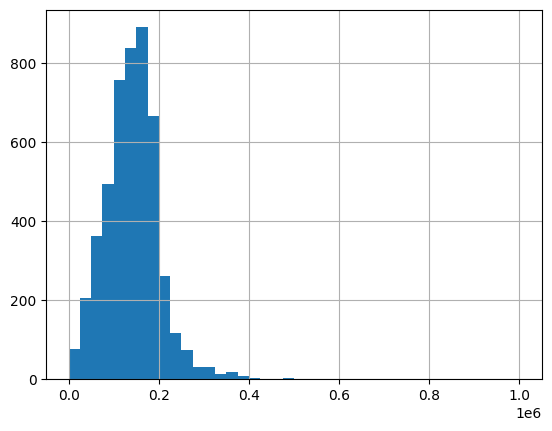

In [21]:
df_bmw.km.hist(bins=40)

In [22]:
df_bmw.km.mean()

np.float64(140959.347862012)

In [23]:
df_bmw.km.median()

141080.0

Como solo tenemos dos registros con km a null, los inferimos con la media o la mediana. En este caso da igual cual coger porque son muy similares (en torno a 141km):

In [24]:
df_bmw["km"] = df_bmw["km"].fillna(df_bmw["km"].mean())

### - Potencia

In [25]:
df_bmw.potencia.isna().sum()

np.int64(1)

<Axes: >

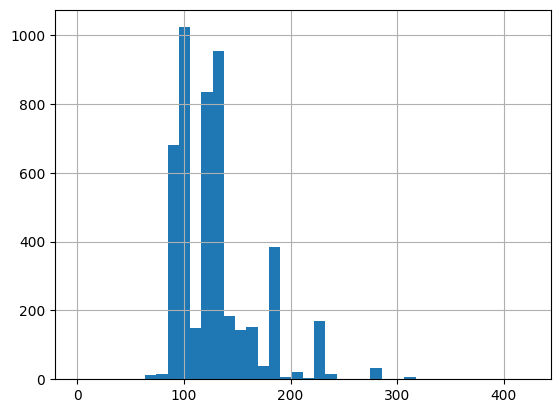

In [26]:
df_bmw.potencia.hist(bins=40)

In [27]:
df_bmw.potencia.mean()

np.float64(128.98182569186287)

In [28]:
df_bmw.potencia.median()

120.0

Al ser un único registro nulo, lo inferimos con la media:

In [29]:
df_bmw["potencia"] = df_bmw["potencia"].fillna(df_bmw["potencia"].mean())

### - fecha_registro y fecha_venta

In [30]:
df_bmw.fecha_registro.isna().sum()

np.int64(2423)

In [31]:
df_bmw.fecha_registro.isna().mean() * 100

np.float64(50.03097253768325)

In [32]:
df_bmw.fecha_venta.isna().sum()

np.int64(1)

In [33]:
df_bmw.fecha_venta.value_counts()

fecha_venta
2018-05-01    809
2018-03-01    738
2018-04-01    691
2018-06-01    603
2018-07-01    537
2018-08-01    527
2018-02-01    502
2018-09-01    223
2018-01-01    208
2007-08-01      1
2010-04-01      1
2009-04-01      1
2008-06-01      1
Name: count, dtype: int64

La mitad de los registros no tienen fecha de registro. En cambio, SOLO un registro no tiene fecha_venta.

In [34]:
df_bmw[["fecha_registro", "fecha_venta"]]

fecha_registro fecha_venta
0        2012-02-01  2018-01-01
1               NaN  2018-02-01
2        2012-04-01  2018-02-01
3               NaN  2018-02-01
4               NaN  2018-04-01
...             ...         ...
4838            NaN  2018-08-01
4839     2015-06-01  2018-08-01
4840     2015-10-01  2018-09-01
4841     2016-04-01  2018-09-01
4842            NaN  2018-09-01

[4843 rows x 2 columns]

No sé si tiene sentido quitar la variable de fecha_registro.... si la mitad de los registros no tienen esta fecha con información...

In [35]:
# PENDIENTE: PENSAR QUE HACER CON fecha_registro

Con fecha_venta, como solo hay un registro sin información y casi todas las ventas fueron en 2018, la vamos a inferir con la moda.

In [36]:
df_bmw["fecha_venta"] = df_bmw["fecha_venta"].fillna(df_bmw["fecha_venta"].mode()[0])

### - tipo_gasolina

In [37]:
df_bmw.tipo_gasolina.isna().sum()

np.int64(5)

In [38]:
df_bmw.tipo_gasolina.value_counts()

tipo_gasolina
diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [39]:
df_bmw["tipo_gasolina"].value_counts(normalize=True) * 100

tipo_gasolina
diesel           95.721372
petrol            3.947912
hybrid_petrol     0.165358
Diesel            0.103348
electro           0.062009
Name: proportion, dtype: float64

Como el 95% de la base es diesel, los 5 registros con tipo_gasolina nulo los inferimos con el valor de la mayoría.

In [40]:
df_bmw["tipo_gasolina"] = df_bmw["tipo_gasolina"].fillna('diesel')

In [41]:
# PENDIENTE: transformar Diesel en diesel y el resto diría yo en 'Otro'
# Ojo! pensar si eliminar esta variable, porque que casi toda sea de diesel igual no aporta mucha información

### - color

In [42]:
df_bmw.color.isna().sum()

np.int64(445)

In [43]:
df_bmw.color.value_counts()

color
black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

In [44]:
df_bmw.color.value_counts(normalize=True) * 100

color
black     34.083674
grey      24.329241
blue      14.711232
white     11.005002
brown      6.866758
silver     6.639382
red        1.068668
beige      0.841291
green      0.318327
orange     0.136426
Name: proportion, dtype: float64

In [45]:
df_bmw["color"] = df_bmw["color"].fillna('desconocido')

Que el 34% de los coches sean color black no tiene el peso suficiente como para inferir a los 445 registros con color a null. Por tanto, decidimos inferirlos con el valor "desconocido"

### - tipo_coche

In [46]:
df_bmw.tipo_coche.isna().sum()

np.int64(1460)

In [47]:
df_bmw.tipo_coche.isna().mean() * 100

np.float64(30.146603345034066)

Desconocemos el tipo de coche de 1.460 registros, es decir, un 30% de la base.

In [48]:
df_bmw.tipo_coche.value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [49]:
df_bmw.tipo_coche.value_counts(normalize=True) * 100

tipo_coche
estate         32.722436
sedan          24.268401
suv            22.317470
hatchback      14.425067
subcompact      2.276086
coupe           2.246527
convertible     0.886787
van             0.857227
Name: proportion, dtype: float64

Vamos a explorar como se distribuyen los valores de tipo_coche con respecto a la variable con la que más correla que es asientos_traseros_plegables:

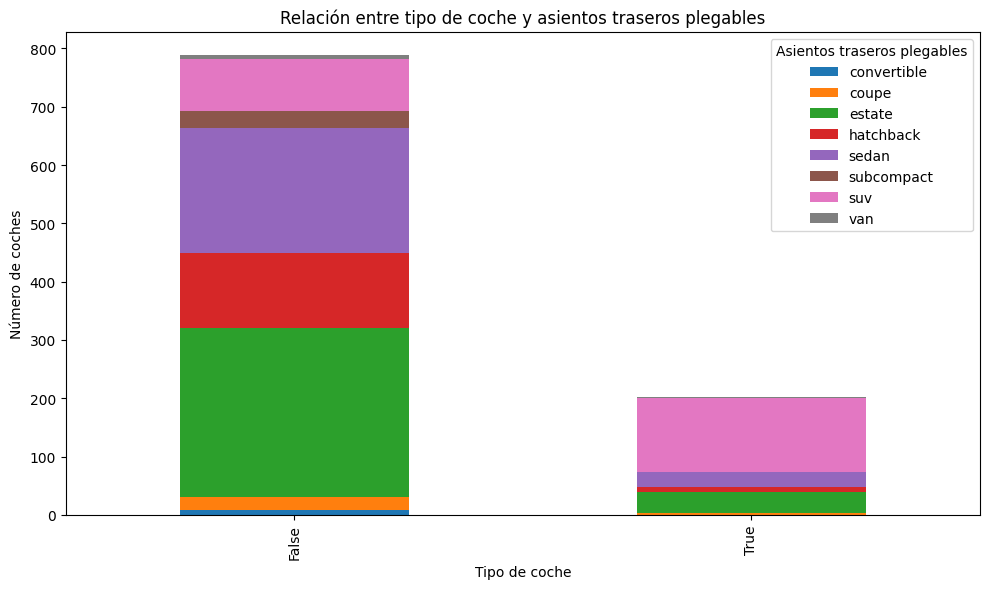

In [50]:
# Tabla de frecuencia
ct = pd.crosstab(df_bmw["asientos_traseros_plegables"], df_bmw["tipo_coche"])

# Plot
ct.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Relación entre tipo de coche y asientos traseros plegables")
plt.xlabel("Tipo de coche")
plt.ylabel("Número de coches")
plt.legend(title="Asientos traseros plegables")
plt.tight_layout()
plt.show()

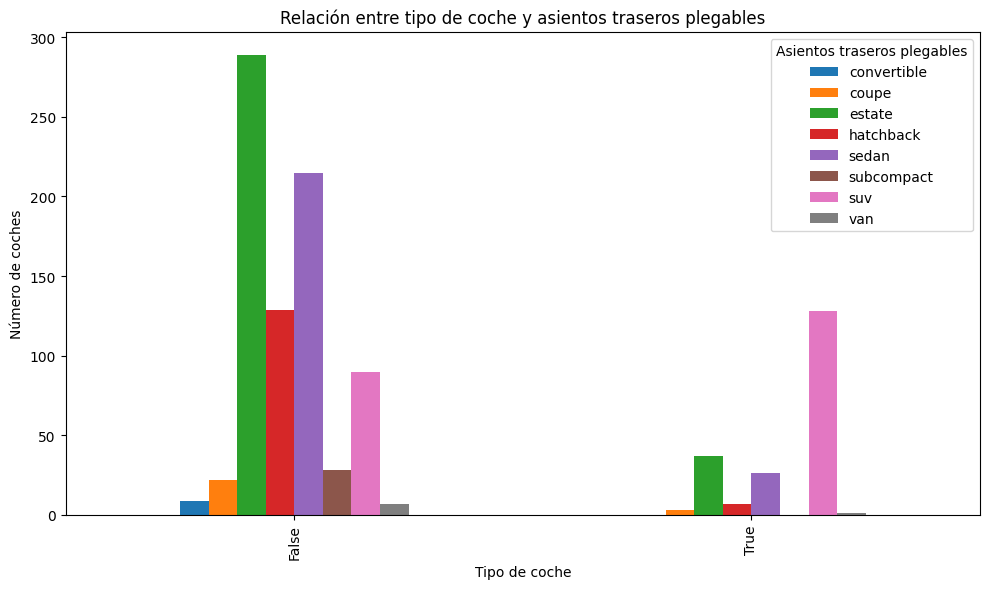

In [51]:
ct.plot(kind="bar", stacked=False, figsize=(10,6))
plt.title("Relación entre tipo de coche y asientos traseros plegables")
plt.xlabel("Tipo de coche")
plt.ylabel("Número de coches")
plt.legend(title="Asientos traseros plegables")
plt.tight_layout()
plt.show()

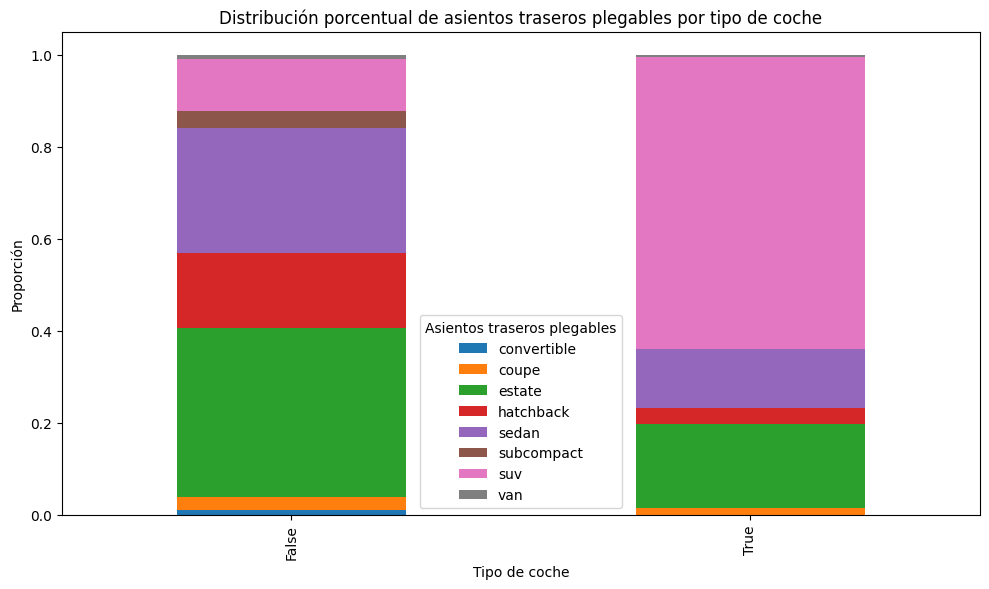

In [52]:
ct_norm = ct.div(ct.sum(axis=1), axis=0)

ct_norm.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Distribución porcentual de asientos traseros plegables por tipo de coche")
plt.xlabel("Tipo de coche")
plt.ylabel("Proporción")
plt.legend(title="Asientos traseros plegables")
plt.tight_layout()
plt.show()

In [53]:
df_bmw[df_bmw.tipo_coche.isna()]["asientos_traseros_plegables"].value_counts()

asientos_traseros_plegables
False    361
True     100
Name: count, dtype: int64

Se ve que más de un 60% de los coches con asientos plegables son de tipo "suv". A pesar de esto, no veo nada más interesente que me haga inferir en los valores nulos de tipo_coche a partir de la variable asientos_traseros_plegables.

Por tanto, hacemos lo mismo que para la anterior variable, que el 32% de la base sea de tipo "estate" no es de peso suficiente como para inferir en los nulos, que en este caso predominan incluso más que la clase dominante. Decidimos inferir los nulos con "desconocido"

In [54]:
df_bmw["tipo_coche"] = df_bmw["tipo_coche"].fillna('desconocido')

### - volante_regulable

In [55]:
df_bmw.volante_regulable.isna().sum()

np.int64(4)

In [56]:
df_bmw.volante_regulable.value_counts()

volante_regulable
True     2662
False    2177
Name: count, dtype: int64

Como son solo 4 registro a null y no predomina una categoría más frente a la otra, decidimos inferir en los valores nulos con el valor más repetido, por ejemplo.

In [57]:
df_bmw["volante_regulable"].mode()

0    True
Name: volante_regulable, dtype: object

In [58]:
df_bmw["volante_regulable"] = df_bmw["volante_regulable"].fillna(df_bmw["volante_regulable"].mode()[0])

/tmp/ipython-input-58-1982800180.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["volante_regulable"] = df_bmw["volante_regulable"].fillna(df_bmw["volante_regulable"].mode()[0])


In [59]:
df_bmw.volante_regulable.value_counts()

volante_regulable
True     2666
False    2177
Name: count, dtype: int64

### - aire_acondicionado

In [60]:

df_bmw.aire_acondicionado.isna().sum()

np.int64(486)

In [61]:
df_bmw.aire_acondicionado.isna().mean() * 100

np.float64(10.035102209374354)

Un 10% de la base no tiene información sobre aire acondicionado

In [62]:
df_bmw.aire_acondicionado.dtype

dtype('O')

In [63]:
df_bmw.aire_acondicionado.value_counts()

aire_acondicionado
True     3465
False     892
Name: count, dtype: int64

In [64]:
df_bmw.aire_acondicionado.value_counts(normalize=True) * 100

aire_acondicionado
True     79.527198
False    20.472802
Name: proportion, dtype: float64

Un 80% de la base de coches tiene aire acondicionado... por tanto podemos asumir que el 10% que no tiene información tambien tendrá aire acondicionado sabiendo que podemos fallar en un 20% de los casos.

In [65]:
df_bmw["aire_acondicionado"] = df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0])

/tmp/ipython-input-65-3733805682.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["aire_acondicionado"] = df_bmw["aire_acondicionado"].fillna(df_bmw["aire_acondicionado"].mode()[0])


In [66]:
df_bmw.aire_acondicionado.dtype

dtype('bool')

### - camara_trasera

In [67]:
df_bmw.camara_trasera.isna().sum()

np.int64(2)

In [68]:
df_bmw.camara_trasera.value_counts()

camara_trasera
False    3864
True      977
Name: count, dtype: int64

In [69]:
df_bmw.camara_trasera.value_counts(normalize=True) * 100

camara_trasera
False    79.818219
True     20.181781
Name: proportion, dtype: float64

Aquí pasa lo mismo, inferimos los 4 valores nulos con el valor más repetido.



In [70]:
df_bmw["camara_trasera"] = df_bmw["camara_trasera"].fillna(df_bmw["camara_trasera"].mode()[0])

/tmp/ipython-input-70-4145998243.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["camara_trasera"] = df_bmw["camara_trasera"].fillna(df_bmw["camara_trasera"].mode()[0])


### - asientos_traseros_plegables

In [71]:
df_bmw.asientos_traseros_plegables.isna().sum()

np.int64(3391)

In [72]:
df_bmw.asientos_traseros_plegables.isna().mean() * 100

np.float64(70.01858352260996)

In [73]:
df_bmw.asientos_traseros_plegables.value_counts()

asientos_traseros_plegables
False    1150
True      302
Name: count, dtype: int64

Considero que como tenemos un 70% de los registros sin información de asientos traseros plegables, no es un campo muy relevante y no merece la pena inferirlo. Solución: lo eliminamos.

In [74]:
df_bmw.drop(columns="asientos_traseros_plegables", inplace=True)

### - elevalunas_electrico

In [75]:
df_bmw.elevalunas_electrico.isna().sum()

np.int64(2)

In [76]:
df_bmw.elevalunas_electrico.value_counts()

elevalunas_electrico
False    2612
True     2229
Name: count, dtype: int64

Inferirmos los valores nulos de este campo de igual manera que volante_regulable: Como son solo 2 registros a null y no predomina una categoría más frente a la otra, decidimos inferir en los valores nulos con el valor más repetido.

In [77]:
df_bmw["elevalunas_electrico"] = df_bmw["elevalunas_electrico"].fillna(df_bmw["elevalunas_electrico"].mode()[0])

/tmp/ipython-input-77-3830710364.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["elevalunas_electrico"] = df_bmw["elevalunas_electrico"].fillna(df_bmw["elevalunas_electrico"].mode()[0])


### - bluetooth

In [78]:
df_bmw.bluetooth.isna().sum()

np.int64(728)

In [79]:
df_bmw.bluetooth.isna().mean() * 100

np.float64(15.032004955606029)

Un 15% de la base no tiene información sobre bluetooth (728).

In [80]:
df_bmw.bluetooth.value_counts()

bluetooth
False    3119
True      996
Name: count, dtype: int64

In [81]:
df_bmw.bluetooth.value_counts(normalize=True) * 100

bluetooth
False    75.795869
True     24.204131
Name: proportion, dtype: float64

Aquí pasa igual que con aire_acondicionado. Un 76% de la base de coches NO tiene bluetooth... por tanto podemos asumir que el 15% que no tiene información tampoco tendrá bluetooth sabiendo que podemos fallar en un 25% de los casos.

In [82]:
df_bmw["bluetooth"] = df_bmw["bluetooth"].fillna(df_bmw["bluetooth"].mode()[0])


/tmp/ipython-input-82-583284846.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw["bluetooth"] = df_bmw["bluetooth"].fillna(df_bmw["bluetooth"].mode()[0])


### - gps

In [83]:
df_bmw.gps.isna().sum()

np.int64(0)

No tiene nulos!

In [84]:
df_bmw.gps.value_counts()

gps
True     4514
False     329
Name: count, dtype: int64

In [85]:
df_bmw.gps.value_counts(normalize=True) * 100

gps
True     93.20669
False     6.79331
Name: proportion, dtype: float64

Ojo! Pensar si borrar esta variable... esta muy desbalanceada, un 93% tiene gps, no se si nos aportará demasiada info.

In [86]:
df_bmw.groupby("gps")["precio"].mean()

gps
False    16010.334347
True     15818.899734
Name: precio, dtype: float64

A pesar de que no haya demasiada diferencia de precio medio en función de si un coche tiene gps o no, de momento, la mantenemos.

### - alerta_lim_velocidad

In [87]:
df_bmw.alerta_lim_velocidad.isna().sum()

np.int64(728)

In [88]:
df_bmw.alerta_lim_velocidad.isna().mean() * 100

np.float64(15.032004955606029)

In [89]:
df_bmw.alerta_lim_velocidad.value_counts()

alerta_lim_velocidad
True     2240
False    1875
Name: count, dtype: int64

In [90]:
df_bmw.alerta_lim_velocidad.value_counts(normalize=True) * 100

alerta_lim_velocidad
True     54.434994
False    45.565006
Name: proportion, dtype: float64

Aquí no vamos a inferir con la moda porque ninguna categoría es predominante... Inferimos los 728 registros con alerta_lim_velocidad a null con "desconocido"

In [91]:
df_bmw["alerta_lim_velocidad"] = df_bmw["alerta_lim_velocidad"].fillna('desconocido')

### - precio

In [92]:
df_bmw.precio.isna().sum()

np.int64(6)

Esta es la variable target y tiene 6 valores a null. Vamos a inspeccionarlos a ver si son relevantes, si no, los eliminamos.

In [93]:
df_bmw[df_bmw.precio.isna()]

modelo        km  potencia fecha_registro tipo_gasolina        color  \
117    420  174740.0     135.0     2013-11-01        diesel  desconocido   
524    520  163803.0     135.0            NaN        diesel         grey   
539    316   34489.0      85.0            NaN        diesel        black   
549    318  157129.0     100.0            NaN        diesel         blue   
569    320  166866.0     120.0            NaN        diesel         blue   
584    320  114771.0     135.0            NaN        diesel         blue   

      tipo_coche  volante_regulable  aire_acondicionado  camara_trasera  \
117        coupe               True                True            True   
524       estate              False                True            True   
539       estate               True               False           False   
549       estate               True                True            True   
569  desconocido               True                True           False   
584  desconocido              False                True           False   

     elevalunas_electrico  bluetooth   gps alerta_lim_velocidad  precio  \
117                  True       True  True                 True     NaN   
524                 False      False  True                False     NaN   
539                 False      False  True                False     NaN   
549                  True      False  True                 True     NaN   
569                  True       True  True                 True     NaN   
584                 False      False  True                False     NaN   

    fecha_venta  
117  2018-05-01  
524  2018-02-01  
539  2018-02-01  
549  2018-03-01  
569  2018-03-01  
584  2018-03-01

No destacan por nada asiq eliminamos estos registros.

In [94]:
df_bmw = df_bmw[df_bmw.precio.notna()]

In [95]:
df_bmw.precio.isna().sum()

np.int64(0)

# **PASO 3: PREPROCESAMIENTO**

## Campos de fechas

In [96]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4837 non-null   object 
 1   km                    4837 non-null   float64
 2   potencia              4837 non-null   float64
 3   fecha_registro        2419 non-null   object 
 4   tipo_gasolina         4837 non-null   object 
 5   color                 4837 non-null   object 
 6   tipo_coche            4837 non-null   object 
 7   volante_regulable     4837 non-null   bool   
 8   aire_acondicionado    4837 non-null   bool   
 9   camara_trasera        4837 non-null   bool   
 10  elevalunas_electrico  4837 non-null   bool   
 11  bluetooth             4837 non-null   bool   
 12  gps                   4837 non-null   bool   
 13  alerta_lim_velocidad  4837 non-null   object 
 14  precio                4837 non-null   float64
 15  fecha_venta           4837

In [97]:
df_bmw[df_bmw["fecha_registro"]<"2001-01-01"]

modelo        km  potencia fecha_registro tipo_gasolina        color  \
25      318  196092.0      85.0     1995-10-01        petrol  desconocido   
1688    523  359648.0     120.0     2000-03-01        petrol        green   
2473    525  230578.0      85.0     1997-07-01        diesel  desconocido   
2574    525  229880.0      85.0     1997-07-01        diesel        black   
2591    316  178231.0      77.0     1999-11-01        petrol        green   
2611    525  230264.0      85.0     1997-07-01        diesel        black   
2771    316  146951.0      66.0     1990-03-01        petrol        white   
3062    318   98097.0      85.0     1994-01-01        petrol         blue   
3198    320  405816.0     100.0     2000-02-01        diesel         blue   
3365    320  261692.0     110.0     2000-02-01        petrol        black   
3380    525  245302.0     105.0     1997-01-01        diesel        green   
3387    525  266641.0      85.0     1999-03-01        diesel        black   
3449    316  184233.0      77.0     1999-06-01        petrol  desconocido   

       tipo_coche  volante_regulable  aire_acondicionado  camara_trasera  \
25    convertible               True               False           False   
1688  desconocido               True               False           False   
2473        sedan              False                True           False   
2574        sedan              False                True           False   
2591        sedan              False               False           False   
2611        sedan              False               False           False   
2771        sedan              False               False           False   
3062        sedan               True               False           False   
3198        sedan              False               False           False   
3365  desconocido              False               False            True   
3380  desconocido              False                True           False   
3387        sedan               True               False           False   
3449        sedan              False               False           False   

      elevalunas_electrico  bluetooth    gps alerta_lim_velocidad  precio  \
25                   False      False  False                False  1800.0   
1688                 False      False   True                 True   800.0   
2473                 False      False   True          desconocido   200.0   
2574                 False      False   True                False   200.0   
2591                 False       True   True                False   700.0   
2611                 False      False   True                False   200.0   
2771                 False      False  False                False  1300.0   
3062                 False      False   True                 True   400.0   
3198                 False      False   True                False   500.0   
3365                  True       True   True                False   700.0   
3380                 False      False   True                 True   900.0   
3387                 False      False   True                False   800.0   
3449                 False      False   True                False   400.0   

     fecha_venta  
25    2018-05-01  
1688  2018-08-01  
2473  2018-08-01  
2574  2018-08-01  
2591  2018-02-01  
2611  2018-08-01  
2771  2018-04-01  
3062  2018-04-01  
3198  2018-05-01  
3365  2018-06-01  
3380  2018-06-01  
3387  2018-06-01  
3449  2018-07-01

In [98]:
df_bmw.fecha_venta.value_counts()

fecha_venta
2018-05-01    809
2018-03-01    735
2018-04-01    691
2018-06-01    603
2018-07-01    537
2018-08-01    527
2018-02-01    500
2018-09-01    223
2018-01-01    208
2007-08-01      1
2010-04-01      1
2009-04-01      1
2008-06-01      1
Name: count, dtype: int64

In [99]:
df_bmw[df_bmw["fecha_venta"]<'2018-01-01']

modelo        km  potencia fecha_registro tipo_gasolina  color  \
42     330  142483.0     180.0            NaN        diesel   blue   
100    320  342768.0     135.0     2011-12-01        diesel  black   
180    320  181052.0     120.0            NaN        diesel  black   
256    316  201102.0      85.0     2013-12-01        diesel  black   

      tipo_coche  volante_regulable  aire_acondicionado  camara_trasera  \
42   convertible               True                True           False   
100  desconocido              False                True           False   
180       estate              False                True           False   
256       estate               True                True           False   

     elevalunas_electrico  bluetooth   gps alerta_lim_velocidad   precio  \
42                   True      False  True                 True  15800.0   
100                  True      False  True          desconocido   8200.0   
180                 False      False  True          desconocido  11500.0   
256                 False      False  True                False   8800.0   

    fecha_venta  
42   2007-08-01  
100  2010-04-01  
180  2009-04-01  
256  2008-06-01

In [100]:
df_bmw[df_bmw["fecha_registro"]> df_bmw["fecha_venta"]] #OJO! esto tiene que estar mal

modelo        km  potencia fecha_registro tipo_gasolina  color  \
100    320  342768.0     135.0     2011-12-01        diesel  black   
256    316  201102.0      85.0     2013-12-01        diesel  black   

      tipo_coche  volante_regulable  aire_acondicionado  camara_trasera  \
100  desconocido              False                True           False   
256       estate               True                True           False   

     elevalunas_electrico  bluetooth   gps alerta_lim_velocidad  precio  \
100                  True      False  True          desconocido  8200.0   
256                 False      False  True                False  8800.0   

    fecha_venta  
100  2010-04-01  
256  2008-06-01

Como solo hay 4 registros cuya fecha_venta sea inferior a 2018 y 2 de ellas son erróneas porque fecha_venta < fecha_registro, vamos a inferir en el valor de fecha_venta para estos registros con la moda.

In [101]:
df_bmw["fecha_venta"] = np.where(df_bmw["fecha_venta"] < "2018-01-01", df_bmw["fecha_venta"].mode()[0], df_bmw["fecha_venta"])

/tmp/ipython-input-101-1680445023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["fecha_venta"] = np.where(df_bmw["fecha_venta"] < "2018-01-01", df_bmw["fecha_venta"].mode()[0], df_bmw["fecha_venta"])


In [102]:
df_bmw.fecha_venta.value_counts()

fecha_venta
2018-05-01    813
2018-03-01    735
2018-04-01    691
2018-06-01    603
2018-07-01    537
2018-08-01    527
2018-02-01    500
2018-09-01    223
2018-01-01    208
Name: count, dtype: int64

In [103]:
# Convertimos los campos de fechas a datetime
date_cols = ["fecha_registro", "fecha_venta"]

for col in date_cols:
    df_bmw[col] = pd.to_datetime(df_bmw[col], errors='coerce')

/tmp/ipython-input-103-1973403745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw[col] = pd.to_datetime(df_bmw[col], errors='coerce')
/tmp/ipython-input-103-1973403745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw[col] = pd.to_datetime(df_bmw[col], errors='coerce')


CAMBIAR!!!! MIRAR CÓMO INFERIR FECHA_REGISTRO CON MODELO

In [104]:
df_fechas = df_bmw[df_bmw['fecha_registro'].notna() & df_bmw['fecha_venta'].notna()].copy()

# Calculamos la diferencia en años desde el registro del coche hasta su venta
df_fechas['años_registro_venta'] = (
    round((df_fechas['fecha_venta'] - df_fechas['fecha_registro']).dt.days / 365,0)
)

print(df_fechas['años_registro_venta'].describe())

count    2419.000000
mean        5.391897
std         2.529927
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        28.000000
Name: años_registro_venta, dtype: float64


<Axes: >

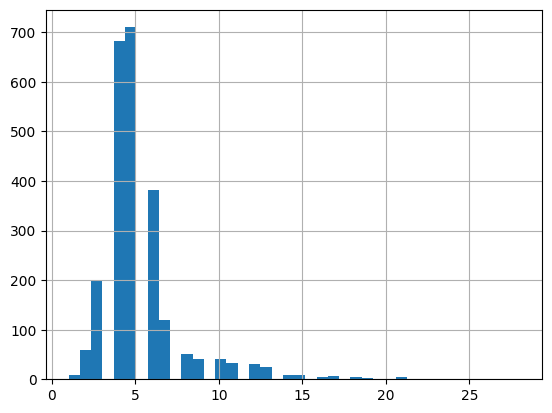

In [105]:
df_fechas['años_registro_venta'].hist(bins=40)

In [106]:
df_fechas['años_registro_venta'].mean()

np.float64(5.3918974782968165)

In [107]:
df_fechas['años_registro_venta'].median()

5.0

Para inferir sobre todos los registros que no tienen fecha_registro informada, vamos quedarnos con el campo df_fechas['años_registro_venta'] que hace referencia a los años que han pasado entre el registro del coche y su venta, y vamos a inferirlos con la media/mediana que son similares.

In [108]:
df_bmw['años_registro_venta'] = df_fechas['años_registro_venta']
df_bmw["años_registro_venta"] = df_bmw["años_registro_venta"].fillna(df_fechas['años_registro_venta'].median())

/tmp/ipython-input-108-935777226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['años_registro_venta'] = df_fechas['años_registro_venta']
/tmp/ipython-input-108-935777226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["años_registro_venta"] = df_bmw["años_registro_venta"].fillna(df_fechas['años_registro_venta'].median())


In [109]:
print(df_fechas['años_registro_venta'].describe())

count    2419.000000
mean        5.391897
std         2.529927
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        28.000000
Name: años_registro_venta, dtype: float64


In [110]:
print(df_bmw['años_registro_venta'].describe())

count    4837.000000
mean        5.195989
std         1.799630
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        28.000000
Name: años_registro_venta, dtype: float64


Ahora, solo tenemos un año de ventas, repartidas por meses. Desconocemos el día porque siempre aparece el día uno entonces lo realmente importante de este campo es el mes de venta.

In [111]:
df_bmw['fecha_venta' + '_month'] = df_bmw['fecha_venta'].dt.month
df_bmw['venta_trimestre'] = df_bmw['fecha_venta'].dt.quarter.map({
    1: 'venta_primer_trimestre',
    2: 'venta_segundo_trimestre',
    3: 'venta_tercer_trimestre',
    4: 'venta_cuarto_trimestre'
})

/tmp/ipython-input-111-425765391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['fecha_venta' + '_month'] = df_bmw['fecha_venta'].dt.month
/tmp/ipython-input-111-425765391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['venta_trimestre'] = df_bmw['fecha_venta'].dt.quarter.map({


In [112]:
df_bmw

modelo        km  potencia fecha_registro tipo_gasolina  \
0                   118  140411.0     100.0     2012-02-01        diesel   
1                    M4   13929.0     317.0            NaT        petrol   
2                   320  183297.0     120.0     2012-04-01        diesel   
3                   420  128035.0     135.0            NaT        diesel   
4                   425   97097.0     160.0            NaT        diesel   
...                 ...       ...       ...            ...           ...   
4838    218 Gran Tourer   39743.0     110.0            NaT        diesel   
4839  218 Active Tourer   49832.0     100.0     2015-06-01        diesel   
4840    218 Gran Tourer   19633.0     110.0     2015-10-01        diesel   
4841  218 Active Tourer   27920.0     110.0     2016-04-01        diesel   
4842                525  195840.0     160.0            NaT        diesel   

       color   tipo_coche  volante_regulable  aire_acondicionado  \
0      black  desconocido               True                True   
1       grey  convertible               True                True   
2      white  desconocido              False               False   
3        red  convertible               True                True   
4     silver  desconocido               True                True   
...      ...          ...                ...                 ...   
4838   black  desconocido              False                True   
4839    grey  desconocido              False                True   
4840    grey          van              False                True   
4841   brown          van               True                True   
4842    grey  desconocido               True                True   

      camara_trasera  elevalunas_electrico  bluetooth   gps  \
0              False                  True      False  True   
1              False                 False       True  True   
2              False                  True      False  True   
3              False                  True       True  True   
4              False                 False       True  True   
...              ...                   ...        ...   ...   
4838           False                 False      False  True   
4839           False                 False      False  True   
4840           False                 False      False  True   
4841           False                 False      False  True   
4842           False                  True      False  True   

     alerta_lim_velocidad   precio fecha_venta  años_registro_venta  \
0             desconocido  11300.0  2018-01-01                  6.0   
1                    True  69700.0  2018-02-01                  5.0   
2                   False  10200.0  2018-02-01                  6.0   
3             desconocido  25100.0  2018-02-01                  5.0   
4                    True  33400.0  2018-04-01                  5.0   
...                   ...      ...         ...                  ...   
4838                False  14600.0  2018-08-01                  5.0   
4839                 True  17500.0  2018-08-01                  3.0   
4840                 True  17000.0  2018-09-01                  3.0   
4841                 True  22700.0  2018-09-01                  2.0   
4842                 True  15500.0  2018-09-01                  5.0   

      fecha_venta_month          venta_trimestre  
0                     1   venta_primer_trimestre  
1                     2   venta_primer_trimestre  
2                     2   venta_primer_trimestre  
3                     2   venta_primer_trimestre  
4                     4  venta_segundo_trimestre  
...                 ...                      ...  
4838                  8   venta_tercer_trimestre  
4839                  8   venta_tercer_trimestre  
4840                  9   venta_tercer_trimestre  
4841                  9   venta_tercer_trimestre  
4842                  9   venta_tercer_trimestre  

[4837 rows x 19 columns]

In [113]:
#Ahora sí, borramos fecha_registro y fecha_venta
df_bmw.drop(columns=["fecha_registro", "fecha_venta"], inplace=True)

/tmp/ipython-input-113-2923657587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw.drop(columns=["fecha_registro", "fecha_venta"], inplace=True)


## Resto de campos

### target: Precio

In [114]:
df_bmw.precio.describe()

count      4837.000000
mean      15831.920612
std        9222.630708
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

<Axes: xlabel='precio'>

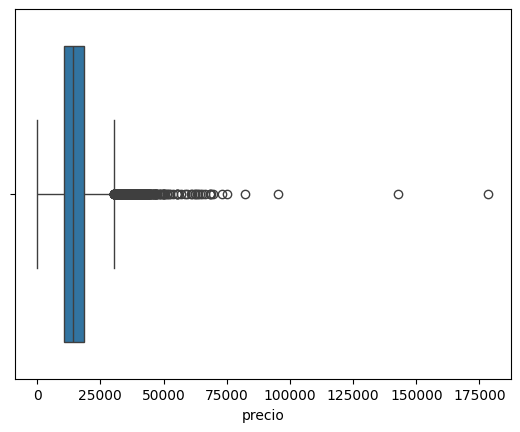

In [115]:
sns.boxplot(x=df_bmw["precio"])

<Axes: >

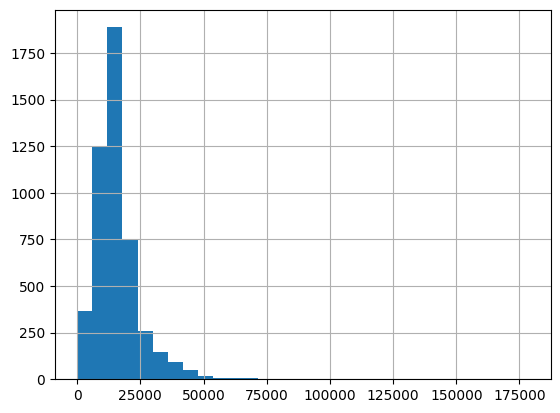

In [116]:
df_bmw["precio"].hist(bins=30)

In [117]:
df_bmw[df_bmw["precio"]>=100000]

modelo        km  potencia tipo_gasolina color tipo_coche  \
4684     X4  103222.0     140.0        diesel  grey        suv   
4753     X3   72515.0     135.0        diesel  blue        suv   

      volante_regulable  aire_acondicionado  camara_trasera  \
4684               True                True           False   
4753              False               False            True   

      elevalunas_electrico  bluetooth    gps alerta_lim_velocidad    precio  \
4684                  True      False   True                 True  142800.0   
4753                 False      False  False                 True  178500.0   

      años_registro_venta  fecha_venta_month         venta_trimestre  
4684                  4.0                  8  venta_tercer_trimestre  
4753                  5.0                  8  venta_tercer_trimestre

Estos 2 precios me parecen muy elevados... Luego aplicaremos una función logaritmica que tiene una distribución muy sesgada a la derecha.

Ojo! con los valores más raros de precio... tanto muy altos como muy bajos

In [118]:
# Los coches con precio por debajo de 500€ pueden tener sentido
# son coches entre 100k-400k kms e incluso muchos registrados hace muchisimos años (muy antiguos)
df_bmw[df_bmw["precio"]<=500]

modelo        km  potencia tipo_gasolina        color   tipo_coche  \
537     320  302006.0     100.0        diesel  desconocido       estate   
565     320  179358.0     120.0        diesel        black  desconocido   
630     318  147558.0     105.0        diesel        white       estate   
879     318  134156.0     105.0        diesel         grey       estate   
1255    320  170381.0     135.0        diesel       silver  desconocido   
1513    520  358332.0     100.0        diesel         blue  desconocido   
1558    520  358333.0     100.0        diesel         blue       estate   
1832    116  174524.0      85.0        diesel         blue    hatchback   
2473    525  230578.0      85.0        diesel  desconocido        sedan   
2574    525  229880.0      85.0        diesel        black        sedan   
2611    525  230264.0      85.0        diesel        black        sedan   
2829    525  439060.0     105.0        diesel       silver  desconocido   
3062    318   98097.0      85.0        petrol         blue        sedan   
3198    320  405816.0     100.0        diesel         blue        sedan   
3449    316  184233.0      77.0        petrol  desconocido        sedan   
3575    316  359661.0      75.0        petrol         grey        sedan   
4356     X3   79685.0     190.0        diesel        black          suv   

      volante_regulable  aire_acondicionado  camara_trasera  \
537               False                True           False   
565               False                True           False   
630               False                True           False   
879               False                True           False   
1255               True                True           False   
1513              False               False           False   
1558              False               False           False   
1832              False                True           False   
2473              False                True           False   
2574              False                True           False   
2611              False               False           False   
2829              False               False            True   
3062               True               False           False   
3198              False               False           False   
3449              False               False           False   
3575              False               False           False   
4356              False               False           False   

      elevalunas_electrico  bluetooth    gps alerta_lim_velocidad  precio  \
537                  False      False   True                False   500.0   
565                  False      False   True                 True   100.0   
630                  False      False  False                 True   100.0   
879                  False      False  False                 True   100.0   
1255                 False      False   True                False   100.0   
1513                  True      False   True                False   400.0   
1558                  True      False   True          desconocido   400.0   
1832                 False      False   True          desconocido   100.0   
2473                 False      False   True          desconocido   200.0   
2574                 False      False   True                False   200.0   
2611                 False      False   True                False   200.0   
2829                 False      False   True                False   100.0   
3062                 False      False   True                 True   400.0   
3198                 False      False   True                False   500.0   
3449                 False      False   True                False   400.0   
3575                 False      False   True                False   400.0   
4356                 False      False  False          desconocido   100.0   

      años_registro_venta  fecha_venta_month          venta_trimestre  
537                   5.0                  4  venta_segundo_

### - modelo

CAMBIAR!!!!! NO AGRUPAR ASI, NO ES LO MISMO 318 QUE 318 GT
TO DO: PENSAR DE QUE MANERA AGRUPAR ESTA VARIABLE PARA REDUCIR

USAR ESTA FUNCIÓN PERO PROBAR A DEJAR LOS GT A PARTE Y VEMOS

In [ ]:
def group_model(model):
    model = str(model).upper()
    if re.match(r'1\d{2}', model): return 'Serie 1'
    elif re.match(r'3\d{2}', model): return 'Serie 3'
    elif re.match(r'5\d{2}', model): return 'Serie 5'
    elif model.startswith('X'): return 'X Series'
    elif model.startswith('M'): return 'M Series'
    elif model.startswith('I'): return 'i Series'
    #
    else: return 'Other'

df_bmwdata_sinNulos_allmodels['modelo_grupo'] = df_bmwdata_sinNulos_allmodels['modelo'].apply(group_model)

In [119]:
df_bmw.modelo.unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', 'Desconocido', '525', '530',
       '535', '320 Gran Turismo', '518', '116', '328', '523', 'X3',
       'M550', '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [120]:
def limpiar_modelo(valor):
    if not isinstance(valor, str) or valor.strip() == '':
        return 'Desconocido'

    valor = valor.strip()  # Elimina espacios iniciales y finales

    # Caso 1: empieza con número + espacio → quedarse con el número
    match_numero = re.match(r'^(\d+)\s+\w+', valor)
    if match_numero:
        return match_numero.group(1)

    # Caso 2: empieza con letras + números + espacio (ej: 'Z4 Roadster') → quedarse con 'Z4'
    match_alfanumerico = re.match(r'^([A-Za-z]+\d+)\s+\w+', valor)
    if match_alfanumerico:
        return match_alfanumerico.group(1)

    # Si solo tiene una palabra (tipo 'X3', '116d', 'i3', 'Desconocido'), la dejamos tal cual
    return valor

In [121]:
df_bmw['modelo_cleaned'] = df_bmw['modelo'].apply(limpiar_modelo)

/tmp/ipython-input-121-3879530698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['modelo_cleaned'] = df_bmw['modelo'].apply(limpiar_modelo)


In [122]:
df_bmw['modelo_cleaned'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', 'i8', '630', '635', '520', 'Desconocido',
       '525', '530', '535', '518', '116', '328', '523', 'X3', 'M550',
       '528', '125', 'i3', '114', 'M135', '418', '730', '123', '740',
       '750', 'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6',
       '216', 'Active Tourer', '214'], dtype=object)

In [123]:
# Ojo! porque hay modelos con bajisima frecuencia que tienen precios altisimos...
# no se yo si cuando hagamos el onehot encoding hay que agrupar las menos frecuentes en "otro"
df_bmw.groupby('modelo_cleaned')['precio'].agg(frecuencia='count', precio_medio='mean').sort_values(by='frecuencia', ascending=False)


frecuencia  precio_medio
modelo_cleaned                          
320                    823  12667.314702
318                    664  11547.891566
520                    655  15870.076336
X3                     438  18175.799087
116                    358   9653.910615
X1                     274  12691.970803
X5                     251  31285.657371
316                    234  10367.948718
525                    184  15363.043478
530                    175  19939.428571
118                    143   9647.552448
420                     76  24167.105263
518                     66  16489.393939
X6                      52  37013.461538
535                     48  23797.916667
X4                      46  33895.652174
120                     36  12416.666667
330                     36  17400.000000
218                     34  16738.235294
730                     33  23766.666667
640                     27  37674.074074
325                     23  15165.217391
740                     18  37772.222222
114                     15  11206.666667
M550                    12  34900.000000
435                     10  32940.000000
335                     10  22730.000000
418                      8  20737.500000
216                      8  14012.500000
M3                       7  36428.571429
i3                       6  21116.666667
528                      6  20300.000000
430                      6  28016.666667
Z4                       6   9500.000000
125                      5  12560.000000
328                      5  16500.000000
220                      4  20775.000000
135                      4  22350.000000
523                      4   6875.000000
Desconocido              3   9666.666667
M235                     3  29300.000000
425                      2  31000.000000
123                      2   8800.000000
225                      2  18750.000000
650                      2   8000.000000
750                      2  37200.000000
M4                       2  61650.000000
214                      1  17800.000000
Active Tourer            1  19000.000000
735                      1   4500.000000
635                      1  19300.000000
630                      1  10500.000000
M5                       1  41600.000000
M135                     1  25700.000000
ActiveHybrid 5           1  21100.000000
i8                       1  95200.000000

In [124]:
#df_bmw['modelo_cleaned'].value_counts(normalize=True)

In [125]:
#Borramos la columna modelo original
df_bmw.drop(columns='modelo', inplace=True)

/tmp/ipython-input-125-1118577433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw.drop(columns='modelo', inplace=True)


In [126]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4837 non-null   float64
 1   potencia              4837 non-null   float64
 2   tipo_gasolina         4837 non-null   object 
 3   color                 4837 non-null   object 
 4   tipo_coche            4837 non-null   object 
 5   volante_regulable     4837 non-null   bool   
 6   aire_acondicionado    4837 non-null   bool   
 7   camara_trasera        4837 non-null   bool   
 8   elevalunas_electrico  4837 non-null   bool   
 9   bluetooth             4837 non-null   bool   
 10  gps                   4837 non-null   bool   
 11  alerta_lim_velocidad  4837 non-null   object 
 12  precio                4837 non-null   float64
 13  años_registro_venta   4837 non-null   float64
 14  fecha_venta_month     4837 non-null   int32  
 15  venta_trimestre       4837

### km

In [127]:
df_bmw.km.describe()

count    4.837000e+03
mean     1.409664e+05
std      6.020833e+04
min     -6.400000e+01
25%      1.028840e+05
50%      1.410630e+05
75%      1.752350e+05
max      1.000376e+06
Name: km, dtype: float64

<Axes: xlabel='km'>

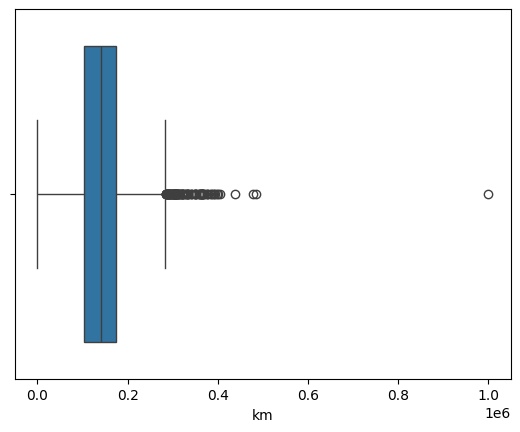

In [128]:
sns.boxplot(data = df_bmw, x = 'km')

In [129]:
df_bmw[df_bmw["km"]>400000] # estos pueden ser, aunq me parece muy raro que un coche tenga casi 500k (pero es posible)

km  potencia tipo_gasolina        color   tipo_coche  \
557    484615.0     120.0        diesel         blue       estate   
1573   400654.0     110.0        diesel        black       estate   
2350   477571.0      85.0        diesel         grey  desconocido   
2829   439060.0     105.0        diesel       silver  desconocido   
3198   405816.0     100.0        diesel         blue        sedan   
3732  1000376.0      90.0        diesel  desconocido  desconocido   

      volante_regulable  aire_acondicionado  camara_trasera  \
557                True                True           False   
1573              False               False            True   
2350              False                True           False   
2829              False               False            True   
3198              False               False           False   
3732               True               False           False   

      elevalunas_electrico  bluetooth    gps alerta_lim_velocidad  precio  \
557                  False      False   True                False  8300.0   
1573                 False      False   True                False  1800.0   
2350                 False       True  False                False  1200.0   
2829                 False      False   True                False   100.0   
3198                 False      False   True                False   500.0   
3732                 False      False   True                False  1400.0   

      años_registro_venta  fecha_venta_month          venta_trimestre  \
557                   7.0                  3   venta_primer_trimestre   
1573                 12.0                  7   venta_tercer_trimestre   
2350                  5.0                  7   venta_tercer_trimestre   
2829                  5.0                  3   venta_primer_trimestre   
3198                 18.0                  5  venta_segundo_trimestre   
3732                 13.0                  6  venta_segundo_trimestre   

     modelo_cleaned  
557             520  
1573            320  
2350            318  
2829            525  
3198            320  
3732            118

TODO: ESTE REGISTO NOS LO CARGAMOS QUE TIENE KM 1M Y ENCIMA MUCHAS VARIABLES NULAS

In [130]:
# pero el que es imposible es el de 1M de kms
df_bmw[df_bmw["km"]==1000376]

km  potencia tipo_gasolina        color   tipo_coche  \
3732  1000376.0      90.0        diesel  desconocido  desconocido   

      volante_regulable  aire_acondicionado  camara_trasera  \
3732               True               False           False   

      elevalunas_electrico  bluetooth   gps alerta_lim_velocidad  precio  \
3732                 False      False  True                False  1400.0   

      años_registro_venta  fecha_venta_month          venta_trimestre  \
3732                 13.0                  6  venta_segundo_trimestre   

     modelo_cleaned  
3732            118

In [131]:
df_bmw[df_bmw["km"]<0] # Esto es un error

km  potencia tipo_gasolina  color tipo_coche  volante_regulable  \
2938 -64.0     230.0        diesel  black      sedan               True   

      aire_acondicionado  camara_trasera  elevalunas_electrico  bluetooth  \
2938                True           False                 False      False   

       gps alerta_lim_velocidad   precio  años_registro_venta  \
2938  True                 True  75000.0                  5.0   

      fecha_venta_month          venta_trimestre modelo_cleaned  
2938                  4  venta_segundo_trimestre            640

In [132]:
print(df_bmw["km"].mean())
print(df_bmw["km"].median())

140966.36834726567
141063.0


Inferimos tanto, el registro que tiene kms negativos como el que tiene 1M de kms, con la media

In [133]:
df_bmw["km"] = np.where(df_bmw["km"]<0, round(df_bmw["km"].mean(),0), df_bmw["km"])

/tmp/ipython-input-133-2431672865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["km"] = np.where(df_bmw["km"]<0, round(df_bmw["km"].mean(),0), df_bmw["km"])
/tmp/ipython-input-133-2431672865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["km"] = np.where(df_bmw["km"]>500000, round(df_bmw["km"].mean(),0), df_bmw["km"])


In [134]:
df_bmw.km.describe()

count      4837.000000
mean     140817.856873
std       58891.273242
min         476.000000
25%      102943.000000
50%      140996.000000
75%      175217.000000
max      484615.000000
Name: km, dtype: float64

### - potencia

In [135]:
df_bmw.potencia.describe()

count    4837.000000
mean      128.995034
std        39.007136
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

<Axes: xlabel='potencia'>

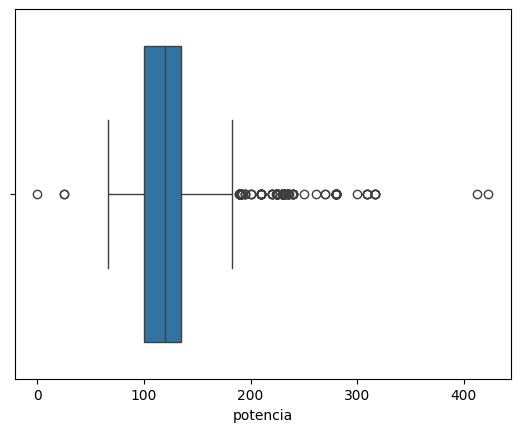

In [136]:
sns.boxplot(data = df_bmw, x = 'potencia')

In [137]:
df_bmw[df_bmw["potencia"]>300]

km  potencia tipo_gasolina   color   tipo_coche  \
1      13929.0     317.0        petrol    grey  convertible   
67     29925.0     309.0        petrol  silver  desconocido   
72     69410.0     317.0        petrol   white  desconocido   
73    170550.0     309.0        petrol    grey        coupe   
93     99283.0     309.0        petrol  silver  desconocido   
139   169970.0     309.0        petrol    grey        coupe   
2944   33670.0     317.0        petrol    blue        sedan   
3092   39250.0     317.0        petrol   black        sedan   
3601  150187.0     412.0        petrol   white        sedan   
4146    2970.0     423.0        petrol     red          suv   

      volante_regulable  aire_acondicionado  camara_trasera  \
1                  True                True           False   
67                 True                True           False   
72                 True                True           False   
73                 True                True           False   
93                False               False           False   
139                True                True           False   
2944               True                True           False   
3092               True                True           False   
3601               True                True            True   
4146               True                True            True   

      elevalunas_electrico  bluetooth   gps alerta_lim_velocidad   precio  \
1                    False       True  True                 True  69700.0   
67                    True       True  True                 True  47000.0   
72                   False       True  True                 True  53600.0   
73                    True      False  True                 True  28000.0   
93                    True      False  True                 True  28600.0   
139                   True      False  True                 True  35700.0   
2944                 False       True  True                 True  51200.0   
3092                 False       True  True                 True  52400.0   
3601                  True       True  True                 True  41600.0   
4146                 False      False  True                 True  82400.0   

      años_registro_venta  fecha_venta_month          venta_trimestre  \
1                     5.0                  2   venta_primer_trimestre   
67                    5.0                  4  venta_segundo_trimestre   
72                    3.0                  3   venta_primer_trimestre   
73                    5.0                  3   venta_primer_trimestre   
93                    5.0                  4  venta_segundo_trimestre   
139                   7.0                  8   venta_tercer_trimestre   
2944                  4.0                  4  venta_segundo_trimestre   
3092                  2.0                  5  venta_segundo_trimestre   
3601                  5.0                  9   venta_tercer_trimestre   
4146                  2.0                  4  venta_segundo_trimestre   

     modelo_cleaned  
1                M4  
67               M3  
72               M4  
73               M3  
93               M3  
139              M3  
2944             M3  
3092             M3  
3601             M5  
4146             X6

TO DO: MIRAR ESTE REGISTRO QUE NO ES NORMAL POTENCIA = 0

In [ ]:
df_bmw[df_bmw["potencia"]=0]

TO DO: MIRAR LOS REGISTROS QUE TIENEN < 70 DE POTENCIA (APROX)

In [ ]:
df_bmw[df_bmw["potencia"]<=70]

Creo que no me parece raro que haya algunos coches con > 250 de potencia. Igual estaría bien después tratar para aplanar estos outliers antes de estandarizar.

### - tipo_gasolina

In [138]:
df_bmw.tipo_gasolina.value_counts()

tipo_gasolina
diesel           4630
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [139]:
df_bmw["tipo_gasolina"] = np.where(df_bmw["tipo_gasolina"] == 'Diesel', 'diesel', df_bmw["tipo_gasolina"])

/tmp/ipython-input-139-3599039946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["tipo_gasolina"] = np.where(df_bmw["tipo_gasolina"] == 'Diesel', 'diesel', df_bmw["tipo_gasolina"])


In [140]:
df_bmw["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4635
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

Como casi toda la base es de diesel, vemos la media de precio por tipo_gasolina para ver si nos ayuda a decidir si la mantenemos o eliminamos.

In [141]:
df_bmw.groupby("tipo_gasolina")["precio"].mean()

tipo_gasolina
diesel           15850.140237
electro          20966.666667
hybrid_petrol    37575.000000
petrol           14398.429319
Name: precio, dtype: float64

En principio la dejamos, se ve:
 como si es de petróleo, los coches son los más baratos, los

*   si es de petróleo, los coches son los más baratos
*   si es de hybrid_petrol, los coches son los más caros (OJO aqui que son significativamente caros)
*   si es de electro, los coches también destacan por ser más caros que los de diesel.




In [142]:
df_bmw[df_bmw["tipo_gasolina"]=='hybrid_petrol']

km  potencia  tipo_gasolina  color   tipo_coche  \
90     12402.0     170.0  hybrid_petrol   grey        coupe   
1796  152328.0      25.0  hybrid_petrol  black  desconocido   
1925  152470.0      25.0  hybrid_petrol  black    hatchback   
2925   94374.0     225.0  hybrid_petrol  brown        sedan   
3690    6572.0      75.0  hybrid_petrol  black  desconocido   
4018   33639.0     180.0  hybrid_petrol   grey          suv   
4214  129317.0     230.0  hybrid_petrol   blue          suv   
4370  134154.0     300.0  hybrid_petrol  black  desconocido   

      volante_regulable  aire_acondicionado  camara_trasera  \
90                 True                True           False   
1796              False                True           False   
1925              False                True           False   
2925               True                True           False   
3690               True                True            True   
4018               True                True           False   
4214               True               False           False   
4370               True                True           False   

      elevalunas_electrico  bluetooth    gps alerta_lim_velocidad   precio  \
90                   False      False  False                 True  95200.0   
1796                 False      False   True          desconocido  20300.0   
1925                 False      False   True                 True  15500.0   
2925                  True       True   True                 True  21100.0   
3690                 False      False   True          desconocido  28000.0   
4018                  True      False   True                 True  52200.0   
4214                 False      False   True                 True  46300.0   
4370                  True      False   True                 True  22000.0   

      años_registro_venta  fecha_venta_month          venta_trimestre  \
90                    5.0                  4  venta_segundo_trimestre   
1796                  5.0                  4  venta_segundo_trimestre   
1925                  5.0                  3   venta_primer_trimestre   
2925                  6.0                  4  venta_segundo_trimestre   
3690                  2.0                  3   venta_primer_trimestre   
4018                  5.0                  3   venta_primer_trimestre   
4214                  5.0                  4  venta_segundo_trimestre   
4370                  5.0                  6  venta_segundo_trimestre   

      modelo_cleaned  
90                i8  
1796              i3  
1925              i3  
2925  ActiveHybrid 5  
3690              i3  
4018              X5  
4214              X5  
4370              X6

### - color

In [143]:
df_bmw.color.value_counts()

color
black          1498
grey           1069
blue            644
white           484
desconocido     444
brown           302
silver          292
red              47
beige            37
green            14
orange            6
Name: count, dtype: int64

In [ ]:
df_bmw.groupby("color")["precio"].mean()

La variable color no necesita más tratamiento. Posteriormente la convertiremos a numérica.

### - tipo coche

In [144]:
df_bmw.tipo_coche.value_counts()

tipo_coche
desconocido    1458
estate         1104
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            75
convertible      30
van              29
Name: count, dtype: int64

La variable tipo_coche no necesita más tratamiento. Posteriormente la convertiremos a numérica.

### - volante_regulable

In [145]:
df_bmw.volante_regulable.value_counts()

volante_regulable
True     2662
False    2175
Name: count, dtype: int64

### - aire_acondicionado

In [146]:
df_bmw.aire_acondicionado.value_counts()

aire_acondicionado
True     3946
False     891
Name: count, dtype: int64

### - camara_trasera

In [147]:
df_bmw.camara_trasera.value_counts()

camara_trasera
False    3863
True      974
Name: count, dtype: int64

### - elevalunas_electrico

In [148]:
df_bmw.elevalunas_electrico.value_counts()

elevalunas_electrico
False    2611
True     2226
Name: count, dtype: int64

### - bluetooth

In [149]:
df_bmw.bluetooth.value_counts()

bluetooth
False    3843
True      994
Name: count, dtype: int64

### - gps

In [150]:
df_bmw.gps.value_counts()

gps
True     4508
False     329
Name: count, dtype: int64

Todos estos campos booleanos no necesitan más tratamiento salvo el posterior de convertirlos a 0/1

### - alerta_lim_velocidad

In [151]:
df_bmw.alerta_lim_velocidad.value_counts()

alerta_lim_velocidad
True           2237
False          1872
desconocido     728
Name: count, dtype: int64

Como hemos convertido esta variable booleana a categórica, vamos a darle algo de formato para luego transformarla a numérica:

In [152]:
df_bmw["alerta_lim_velocidad"] = df_bmw["alerta_lim_velocidad"].map({True: 'si', False: 'no', 'desconocido': 'desconocido'})

/tmp/ipython-input-152-3735943769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw["alerta_lim_velocidad"] = df_bmw["alerta_lim_velocidad"].map({True: 'si', False: 'no', 'desconocido': 'desconocido'})


In [153]:
df_bmw.alerta_lim_velocidad.value_counts()

alerta_lim_velocidad
si             2237
no             1872
desconocido     728
Name: count, dtype: int64

# **PASO 4: OUTLIERS**

Una vez identificados los campos con outliers, pasamos a tratarlos.

<Axes: >

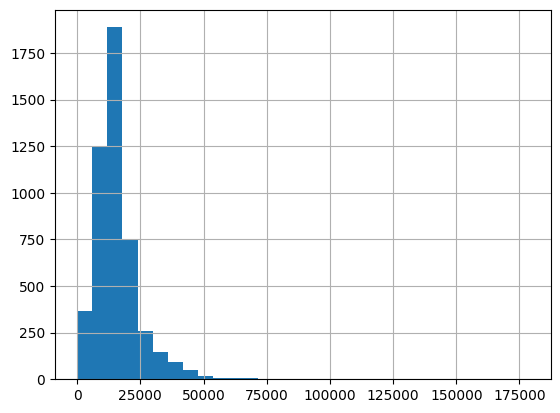

In [154]:
df_bmw['precio'].hist(bins=30)

In [155]:
# Para variables con distribuciones muy sesgadas hacia la izq aplicamos una función logaritmica
df_bmw['precio_log'] = np.log1p(df_bmw['precio'])

/tmp/ipython-input-155-434430735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['precio_log'] = np.log1p(df_bmw['precio'])


<Axes: xlabel='km', ylabel='precio'>

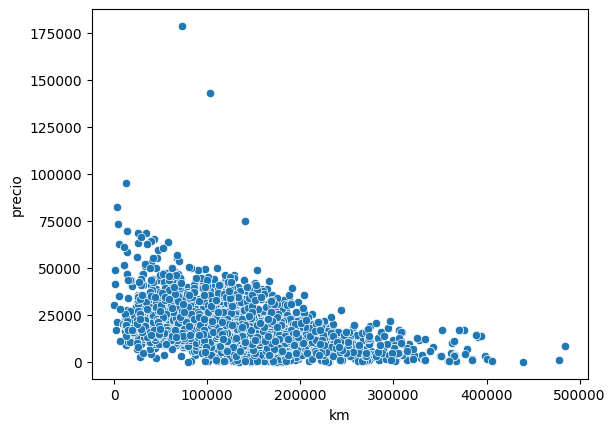

In [156]:
sns.scatterplot(data=df_bmw, x='km', y='precio')

<Axes: xlabel='km'>

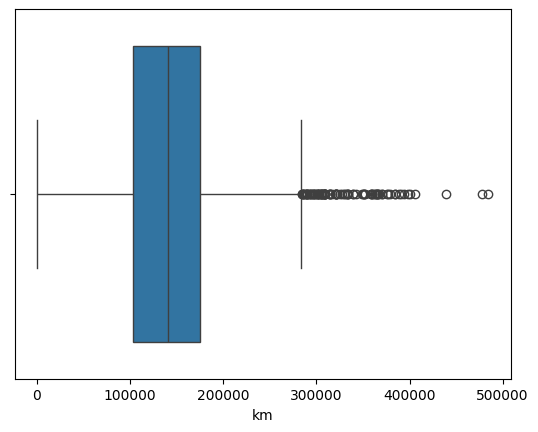

In [157]:
sns.boxplot(data = df_bmw, x = 'km')

<Axes: xlabel='potencia', ylabel='precio'>

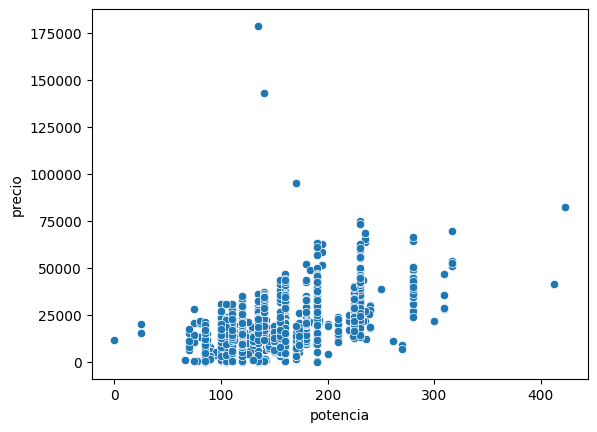

In [158]:
sns.scatterplot(data=df_bmw, x='potencia', y='precio')

<Axes: xlabel='potencia'>

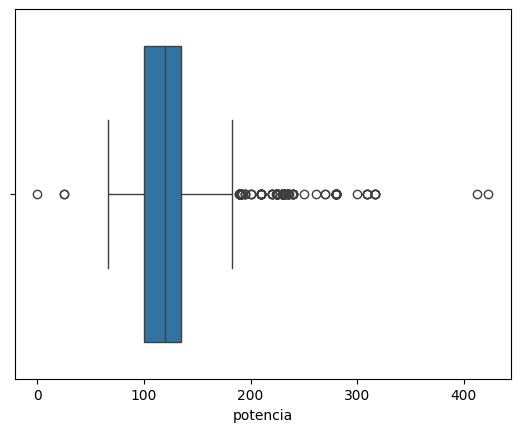

In [159]:
sns.boxplot(data = df_bmw, x = 'potencia')

In [160]:
# Considero que los valores atìpicos de kms y potencia pueden ser válidos, pero pueden distorsionar el modelo.
# Solución: aplicamos transformaciones logaritmicas también para estas dos variables:

df_bmw['potencia_log'] = np.log1p(df_bmw['potencia'])
df_bmw['km_log'] = np.log1p(df_bmw['km'])

/tmp/ipython-input-160-1610515583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['potencia_log'] = np.log1p(df_bmw['potencia'])
/tmp/ipython-input-160-1610515583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['km_log'] = np.log1p(df_bmw['km'])


Importante: Dejamos las columnas originales precio, km y potencia, a modo descriptivo, pero no serán variables input para el modelo.

In [161]:
cols_to_drop = ['km','potencia','precio']
df_bmw.drop(columns=cols_to_drop, inplace=True)

/tmp/ipython-input-161-1875888896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw.drop(columns=cols_to_drop, inplace=True)


# **PASO 5: NORMALIZACIÓN**

El precio no se toca que es el target.

Variables a escalar con minmaxscaler:


1.   las numéricas: SI
2.   las booleanas: convertirlas a 0/1
3.   las categóricas: al paso 5, OneHotEnconding




In [162]:
df_bmw.dtypes

tipo_gasolina            object
color                    object
tipo_coche               object
volante_regulable          bool
aire_acondicionado         bool
camara_trasera             bool
elevalunas_electrico       bool
bluetooth                  bool
gps                        bool
alerta_lim_velocidad     object
años_registro_venta     float64
fecha_venta_month         int32
venta_trimestre          object
modelo_cleaned           object
precio_log              float64
potencia_log            float64
km_log                  float64
dtype: object

In [163]:
# Como parece que unicamente la columna 'gps' la detecta como bool, vamos a transformar el resto:
for col in ['volante_regulable','aire_acondicionado','camara_trasera','elevalunas_electrico','bluetooth']:
  df_bmw[col] = df_bmw[col].astype('bool')

df_bmw.dtypes

/tmp/ipython-input-163-1279180042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw[col] = df_bmw[col].astype('bool')
/tmp/ipython-input-163-1279180042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw[col] = df_bmw[col].astype('bool')
/tmp/ipython-input-163-1279180042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

tipo_gasolina            object
color                    object
tipo_coche               object
volante_regulable          bool
aire_acondicionado         bool
camara_trasera             bool
elevalunas_electrico       bool
bluetooth                  bool
gps                        bool
alerta_lim_velocidad     object
años_registro_venta     float64
fecha_venta_month         int32
venta_trimestre          object
modelo_cleaned           object
precio_log              float64
potencia_log            float64
km_log                  float64
dtype: object

In [164]:
target = ['precio_log']

def obtener_lista_variables(dataset):
    lista_numericas = []
    lista_boolean = []
    lista_categoricas = []

    for i in dataset:
        if i in target:
            continue  # saltar si es target o no queremos usarla

        kind = dataset[i].dtype.kind

        if kind == "b":  # si es boolean
            lista_boolean.append(i)
        elif kind in ("f", "i"):
            if len(dataset[i].unique()) == 2:
                lista_boolean.append(i)
            else:
                lista_numericas.append(i)
        elif kind == "O":
            lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas


In [165]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_bmw)

In [166]:
lista_numericas

['años_registro_venta', 'fecha_venta_month', 'potencia_log', 'km_log']

In [167]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps']

In [168]:
lista_categoricas

['tipo_gasolina',
 'color',
 'tipo_coche',
 'alerta_lim_velocidad',
 'venta_trimestre',
 'modelo_cleaned']

In [169]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tipo_gasolina         4837 non-null   object 
 1   color                 4837 non-null   object 
 2   tipo_coche            4837 non-null   object 
 3   volante_regulable     4837 non-null   bool   
 4   aire_acondicionado    4837 non-null   bool   
 5   camara_trasera        4837 non-null   bool   
 6   elevalunas_electrico  4837 non-null   bool   
 7   bluetooth             4837 non-null   bool   
 8   gps                   4837 non-null   bool   
 9   alerta_lim_velocidad  4837 non-null   object 
 10  años_registro_venta   4837 non-null   float64
 11  fecha_venta_month     4837 non-null   int32  
 12  venta_trimestre       4837 non-null   object 
 13  modelo_cleaned        4837 non-null   object 
 14  precio_log            4837 non-null   float64
 15  potencia_log          4837

**Normalizamos valores de las variables numéricas:**

In [170]:
df_bmw[lista_numericas]

años_registro_venta  fecha_venta_month  potencia_log     km_log
0                     6.0                  1      4.615121  11.852336
1                     5.0                  2      5.762051   9.541800
2                     6.0                  2      4.795791  12.118869
3                     5.0                  2      4.912655  11.760067
4                     5.0                  4      5.081404  11.483476
...                   ...                ...           ...        ...
4838                  5.0                  8      4.709530  10.590214
4839                  3.0                  8      4.615121  10.816433
4840                  3.0                  9      4.709530   9.885018
4841                  2.0                  9      4.709530  10.237134
4842                  5.0                  9      5.081404  12.185058

[4837 rows x 4 columns]

In [171]:
scaler = MinMaxScaler()

In [172]:
df_bmw[lista_numericas] = scaler.fit_transform(df_bmw[lista_numericas]) # Transformamos las variables numéricas del dataset con MinMaxScaler


/tmp/ipython-input-172-1272228087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw[lista_numericas] = scaler.fit_transform(df_bmw[lista_numericas]) # Transformamos las variables numéricas del dataset con MinMaxScaler


**Las variables booleanas las pasamos a variables enteras del tipo 0/1:**

In [173]:
df_bmw[lista_boolean]

volante_regulable  aire_acondicionado  camara_trasera  \
0                  True                True           False   
1                  True                True           False   
2                 False               False           False   
3                  True                True           False   
4                  True                True           False   
...                 ...                 ...             ...   
4838              False                True           False   
4839              False                True           False   
4840              False                True           False   
4841               True                True           False   
4842               True                True           False   

      elevalunas_electrico  bluetooth   gps  
0                     True      False  True  
1                    False       True  True  
2                     True      False  True  
3                     True       True  True  
4                    False       True  True  
...                    ...        ...   ...  
4838                 False      False  True  
4839                 False      False  True  
4840                 False      False  True  
4841                 False      False  True  
4842                  True      False  True  

[4837 rows x 6 columns]

In [174]:
df_bmw[lista_boolean] = df_bmw[lista_boolean].astype(int)

/tmp/ipython-input-174-1544107259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw[lista_boolean] = df_bmw[lista_boolean].astype(int)


# **PASO 5: ONE HOT ENCODING**

**Y, finalmente, aquí realizamos la transformación de las variables categóricas en numéricas:**

In [175]:
df_bmw[lista_categoricas]

tipo_gasolina   color   tipo_coche alerta_lim_velocidad  \
0           diesel   black  desconocido          desconocido   
1           petrol    grey  convertible                   si   
2           diesel   white  desconocido                   no   
3           diesel     red  convertible          desconocido   
4           diesel  silver  desconocido                   si   
...            ...     ...          ...                  ...   
4838        diesel   black  desconocido                   no   
4839        diesel    grey  desconocido                   si   
4840        diesel    grey          van                   si   
4841        diesel   brown          van                   si   
4842        diesel    grey  desconocido                   si   

              venta_trimestre modelo_cleaned  
0      venta_primer_trimestre            118  
1      venta_primer_trimestre             M4  
2      venta_primer_trimestre            320  
3      venta_primer_trimestre            420  
4     venta_segundo_trimestre            425  
...                       ...            ...  
4838   venta_tercer_trimestre            218  
4839   venta_tercer_trimestre            218  
4840   venta_tercer_trimestre            218  
4841   venta_tercer_trimestre            218  
4842   venta_tercer_trimestre            525  

[4837 rows x 6 columns]

In [176]:
# Primero hay que analizar una a una, porque no todos los valores serán relevantes para convertirse en columna

In [177]:
for col in lista_categoricas:
    print(df_bmw[col].value_counts())
    print("-------------------------")

tipo_gasolina
diesel           4635
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64
-------------------------
color
black          1498
grey           1069
blue            644
white           484
desconocido     444
brown           302
silver          292
red              47
beige            37
green            14
orange            6
Name: count, dtype: int64
-------------------------
tipo_coche
desconocido    1458
estate         1104
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            75
convertible      30
van              29
Name: count, dtype: int64
-------------------------
alerta_lim_velocidad
si             2237
no             1872
desconocido     728
Name: count, dtype: int64
-------------------------
venta_trimestre
venta_segundo_trimestre    2107
venta_primer_trimestre     1443
venta_tercer_trimestre     1287
Name: count, dtype: int64
-------------------------
modelo_cleaned
320          

In [178]:
for col in lista_categoricas:
    print(df_bmw[col].value_counts(normalize=True))
    print("-------------------------")

tipo_gasolina
diesel           0.958239
petrol           0.039487
hybrid_petrol    0.001654
electro          0.000620
Name: proportion, dtype: float64
-------------------------
color
black          0.309696
grey           0.221005
blue           0.133140
white          0.100062
desconocido    0.091792
brown          0.062435
silver         0.060368
red            0.009717
beige          0.007649
green          0.002894
orange         0.001240
Name: proportion, dtype: float64
-------------------------
tipo_coche
desconocido    0.301427
estate         0.228241
sedan          0.169733
suv            0.156088
hatchback      0.100889
subcompact     0.015919
coupe          0.015505
convertible    0.006202
van            0.005995
Name: proportion, dtype: float64
-------------------------
alerta_lim_velocidad
si             0.462477
no             0.387017
desconocido    0.150507
Name: proportion, dtype: float64
-------------------------
venta_trimestre
venta_segundo_trimestre    0.435601
vent

In [179]:
df_bmw

tipo_gasolina   color   tipo_coche  volante_regulable  \
0           diesel   black  desconocido                  1   
1           petrol    grey  convertible                  1   
2           diesel   white  desconocido                  0   
3           diesel     red  convertible                  1   
4           diesel  silver  desconocido                  1   
...            ...     ...          ...                ...   
4838        diesel   black  desconocido                  0   
4839        diesel    grey  desconocido                  0   
4840        diesel    grey          van                  0   
4841        diesel   brown          van                  1   
4842        diesel    grey  desconocido                  1   

      aire_acondicionado  camara_trasera  elevalunas_electrico  bluetooth  \
0                      1               0                     1          0   
1                      1               0                     0          1   
2                      0               0                     1          0   
3                      1               0                     1          1   
4                      1               0                     0          1   
...                  ...             ...                   ...        ...   
4838                   1               0                     0          0   
4839                   1               0                     0          0   
4840                   1               0                     0          0   
4841                   1               0                     0          0   
4842                   1               0                     1          0   

      gps alerta_lim_velocidad  años_registro_venta  fecha_venta_month  \
0       1          desconocido             0.185185              0.000   
1       1                   si             0.148148              0.125   
2       1                   no             0.185185              0.125   
3       1          desconocido             0.148148              0.125   
4       1                   si             0.148148              0.375   
...   ...                  ...                  ...                ...   
4838    1                   no             0.148148              0.875   
4839    1                   si             0.074074              0.875   
4840    1                   si             0.074074              1.000   
4841    1                   si             0.037037              1.000   
4842    1                   si             0.148148              1.000   

              venta_trimestre modelo_cleaned  precio_log  potencia_log  \
0      venta_primer_trimestre            118    9.332646      0.762863   
1      venta_primer_trimestre             M4   11.151970      0.952447   
2      venta_primer_trimestre            320    9.230241      0.792728   
3      venta_primer_trimestre            420   10.130663      0.812045   
4     venta_segundo_trimestre            425   10.416341      0.839939   
...                       ...            ...         ...           ...   
4838   venta_tercer_trimestre            218    9.588845      0.778469   
4839   venta_tercer_trimestre            218    9.770013      0.762863   
4840   venta_tercer_trimestre            218    9.741027      0.778469   
4841   venta_tercer_trimestre            218   10.030164      0.778469   
4842   venta_tercer_trimestre            525    9.648660      0.839939   

        km_log  
0     0.821079  
1     0.487360  
2     0.859575  
3     0.807752  
4     0.767803  
...        ...  
4838  0.638786  
4839  0.671460  
4840  0.536932  
4841  0.587790  
4842  0.869135  

[4837 rows x 17 columns]

In [180]:
def agrupar_valores_no_frecuentes(df, columna, umbral=0.025, nombre_categoria='otro', nombre_columna_salida=None):
    """
    Agrupa los valores menos frecuentes de una columna categórica en una categoría 'otro'.

    Parámetros:
    - df: DataFrame de entrada
    - columna: nombre de la columna categórica
    - umbral: umbral mínimo de frecuencia relativa (0.025 = 2,5%)
    - nombre_categoria: nombre que se asignará a los valores poco frecuentes
    - nombre_columna_salida: si se indica, crea una nueva columna con este nombre;
      si no, sobrescribe la columna original

    Retorna:
    - DataFrame con la columna modificada o añadida según nombre_columna_salida
    """
    proporciones = df[columna].value_counts(normalize=True)
    categorias_comunes = proporciones[proporciones >= umbral].index

    serie_modificada = df[columna].where(df[columna].isin(categorias_comunes), other=nombre_categoria)

    if nombre_columna_salida:
        df[nombre_columna_salida] = serie_modificada
    else:
        df[columna] = serie_modificada

    return df



In [181]:
df_bmw["modelo_cleaned"].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', 'i8', '630', '635', '520', 'Desconocido',
       '525', '530', '535', '518', '116', '328', '523', 'X3', 'M550',
       '528', '125', 'i3', '114', 'M135', '418', '730', '123', '740',
       '750', 'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6',
       '216', 'Active Tourer', '214'], dtype=object)

In [182]:
df_bmw["modelo_cleaned"].value_counts()

modelo_cleaned
320               823
318               664
520               655
X3                438
116               358
X1                274
X5                251
316               234
525               184
530               175
118               143
420                76
518                66
X6                 52
535                48
X4                 46
120                36
330                36
218                34
730                33
640                27
325                23
740                18
114                15
M550               12
435                10
335                10
418                 8
216                 8
M3                  7
i3                  6
528                 6
430                 6
Z4                  6
125                 5
328                 5
220                 4
523                 4
135                 4
M235                3
Desconocido         3
425                 2
750                 2
650                 2
M4                  2
123                 2
225                 2
i8                  1
630                 1
635                 1
M135                1
ActiveHybrid 5      1
735                 1
M5                  1
Active Tourer       1
214                 1
Name: count, dtype: int64

In [183]:
df_bmw["color"].value_counts()

color
black          1498
grey           1069
blue            644
white           484
desconocido     444
brown           302
silver          292
red              47
beige            37
green            14
orange            6
Name: count, dtype: int64

TO DO: PENSAR EN SI AGRUPAR LOS VALORES DE COLOR!!! QUE IGUAL ES INTERESANTE DEJAR LOS COLORES MÁS RARETES (MENOS REPETIDOS) POR TENER PRECIOS BAJOS/ALTOS

In [184]:
df_bmw = agrupar_valores_no_frecuentes(df_bmw, 'color', umbral=0.025, nombre_categoria='otros', nombre_columna_salida='color_agrup')
df_bmw = agrupar_valores_no_frecuentes(df_bmw, 'modelo_cleaned', umbral=0.025, nombre_categoria='otros', nombre_columna_salida='modelo_cleaned_agrup')


/tmp/ipython-input-180-2037947000.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nombre_columna_salida] = serie_modificada
/tmp/ipython-input-180-2037947000.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nombre_columna_salida] = serie_modificada


In [185]:
df_bmw["modelo_cleaned_agrup"].value_counts()

modelo_cleaned_agrup
320      823
318      664
520      655
otros    638
X3       438
116      358
X1       274
X5       251
316      234
525      184
530      175
118      143
Name: count, dtype: int64

In [186]:
df_bmw["modelo_cleaned_agrup"].value_counts()

modelo_cleaned_agrup
320      823
318      664
520      655
otros    638
X3       438
116      358
X1       274
X5       251
316      234
525      184
530      175
118      143
Name: count, dtype: int64

In [187]:
df_bmw["color_agrup"].value_counts()

color_agrup
black          1498
grey           1069
blue            644
white           484
desconocido     444
brown           302
silver          292
otros           104
Name: count, dtype: int64

In [188]:
cols_to_drop = ['color','modelo_cleaned']
df_bmw.drop(columns=cols_to_drop, inplace=True)

/tmp/ipython-input-188-3207923411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw.drop(columns=cols_to_drop, inplace=True)


Una vez transformadas las dos variables que tenían muchos valores, hacemos el OHE para todas:

In [189]:
df_bmw

tipo_gasolina   tipo_coche  volante_regulable  aire_acondicionado  \
0           diesel  desconocido                  1                   1   
1           petrol  convertible                  1                   1   
2           diesel  desconocido                  0                   0   
3           diesel  convertible                  1                   1   
4           diesel  desconocido                  1                   1   
...            ...          ...                ...                 ...   
4838        diesel  desconocido                  0                   1   
4839        diesel  desconocido                  0                   1   
4840        diesel          van                  0                   1   
4841        diesel          van                  1                   1   
4842        diesel  desconocido                  1                   1   

      camara_trasera  elevalunas_electrico  bluetooth  gps  \
0                  0                     1          0    1   
1                  0                     0          1    1   
2                  0                     1          0    1   
3                  0                     1          1    1   
4                  0                     0          1    1   
...              ...                   ...        ...  ...   
4838               0                     0          0    1   
4839               0                     0          0    1   
4840               0                     0          0    1   
4841               0                     0          0    1   
4842               0                     1          0    1   

     alerta_lim_velocidad  años_registro_venta  fecha_venta_month  \
0             desconocido             0.185185              0.000   
1                      si             0.148148              0.125   
2                      no             0.185185              0.125   
3             desconocido             0.148148              0.125   
4                      si             0.148148              0.375   
...                   ...                  ...                ...   
4838                   no             0.148148              0.875   
4839                   si             0.074074              0.875   
4840                   si             0.074074              1.000   
4841                   si             0.037037              1.000   
4842                   si             0.148148              1.000   

              venta_trimestre  precio_log  potencia_log    km_log color_agrup  \
0      venta_primer_trimestre    9.332646      0.762863  0.821079       black   
1      venta_primer_trimestre   11.151970      0.952447  0.487360        grey   
2      venta_primer_trimestre    9.230241      0.792728  0.859575       white   
3      venta_primer_trimestre   10.130663      0.812045  0.807752       otros   
4     venta_segundo_trimestre   10.416341      0.839939  0.767803      silver   
...                       ...         ...           ...       ...         ...   
4838   venta_tercer_trimestre    9.588845      0.778469  0.638786       black   
4839   venta_tercer_trimestre    9.770013      0.762863  0.671460        grey   
4840   venta_tercer_trimestre    9.741027      0.778469  0.536932        grey   
4841   venta_tercer_trimestre   10.030164      0.778469  0.587790       brown   
4842   venta_tercer_trimestre    9.648660      0.839939  0.869135        grey   

     modelo_cleaned_agrup  
0                     118  
1                   otros  
2                     320  
3                   otros  
4                   otros  
...                   ...  
4838                otros  
4839                otros  
4840                otros  
4841                otros  
4842                  525  

[4837 rows x 17 columns]

In [190]:
ohe_cols = ['modelo_cleaned_agrup', 'color_agrup', 'tipo_gasolina', 'tipo_coche', 'alerta_lim_velocidad', 'venta_trimestre']


ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int, handle_unknown='ignore')
encoded_array = ohe.fit_transform(df_bmw[ohe_cols])

cols_encoded = ohe.get_feature_names_out(ohe_cols)
df_encoded = pd.DataFrame(encoded_array, columns=cols_encoded, index=df_bmw.index)

df_bmw = pd.concat([df_bmw, df_encoded], axis=1)

In [191]:
df_bmw

tipo_gasolina   tipo_coche  volante_regulable  aire_acondicionado  \
0           diesel  desconocido                  1                   1   
1           petrol  convertible                  1                   1   
2           diesel  desconocido                  0                   0   
3           diesel  convertible                  1                   1   
4           diesel  desconocido                  1                   1   
...            ...          ...                ...                 ...   
4838        diesel  desconocido                  0                   1   
4839        diesel  desconocido                  0                   1   
4840        diesel          van                  0                   1   
4841        diesel          van                  1                   1   
4842        diesel  desconocido                  1                   1   

      camara_trasera  elevalunas_electrico  bluetooth  gps  \
0                  0                     1          0    1   
1                  0                     0          1    1   
2                  0                     1          0    1   
3                  0                     1          1    1   
4                  0                     0          1    1   
...              ...                   ...        ...  ...   
4838               0                     0          0    1   
4839               0                     0          0    1   
4840               0                     0          0    1   
4841               0                     0          0    1   
4842               0                     1          0    1   

     alerta_lim_velocidad  años_registro_venta  ...  tipo_coche_estate  \
0             desconocido             0.185185  ...                  0   
1                      si             0.148148  ...                  0   
2                      no             0.185185  ...                  0   
3             desconocido             0.148148  ...                  0   
4                      si             0.148148  ...                  0   
...                   ...                  ...  ...                ...   
4838                   no             0.148148  ...                  0   
4839                   si             0.074074  ...                  0   
4840                   si             0.074074  ...                  0   
4841                   si             0.037037  ...                  0   
4842                   si             0.148148  ...                  0   

     tipo_coche_hatchback  tipo_coche_sedan  tipo_coche_subcompact  \
0                       0                 0                      0   
1                       0                 0                      0   
2                       0                 0                      0   
3                       0                 0                      0   
4                       0                 0                      0   
...                   ...               ...                    ...   
4838                    0                 0                      0   
4839                    0                 0                      0   
4840                    0                 0                      0   
4841                    0                 0                      0   
4842                    0                 0                      0   

      tipo_coche_suv tipo_coche_van alerta_lim_velocidad_no  \
0                  0              0                       0   
1                  0              0                       0   
2                  0              0                       1   
3                  0              0                       0   
4                  0              0                       0   
...              ...            ...                     ...   
4838               0              0                       1   
4839               0              0                       0   
4840               0              1                       0   
4841       

In [192]:
cols_to_drop = ['modelo_cleaned_agrup', 'color_agrup', 'tipo_gasolina', 'tipo_coche', 'alerta_lim_velocidad', 'venta_trimestre']
df_bmw.drop(columns=cols_to_drop, inplace=True)

In [193]:
pd.set_option('display.max_columns', None)
df_bmw.head()

volante_regulable  aire_acondicionado  camara_trasera  \
0                  1                   1               0   
1                  1                   1               0   
2                  0                   0               0   
3                  1                   1               0   
4                  1                   1               0   

   elevalunas_electrico  bluetooth  gps  años_registro_venta  \
0                     1          0    1             0.185185   
1                     0          1    1             0.148148   
2                     1          0    1             0.185185   
3                     1          1    1             0.148148   
4                     0          1    1             0.148148   

   fecha_venta_month  precio_log  potencia_log    km_log  \
0              0.000    9.332646      0.762863  0.821079   
1              0.125   11.151970      0.952447  0.487360   
2              0.125    9.230241      0.792728  0.859575   
3              0.125   10.130663      0.812045  0.807752   
4              0.375   10.416341      0.839939  0.767803   

   modelo_cleaned_agrup_118  modelo_cleaned_agrup_316  \
0                         1                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   modelo_cleaned_agrup_318  modelo_cleaned_agrup_320  \
0                         0                         0   
1                         0                         0   
2                         0                         1   
3                         0                         0   
4                         0                         0   

   modelo_cleaned_agrup_520  modelo_cleaned_agrup_525  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   modelo_cleaned_agrup_530  modelo_cleaned_agrup_X1  modelo_cleaned_agrup_X3  \
0                         0                        0                        0   
1                         0                        0                        0   
2                         0                        0                        0   
3                         0                        0                        0   
4                         0                        0                        0   

   modelo_cleaned_agrup_X5  modelo_cleaned_agrup_otros  color_agrup_blue  \
0                        0                           0                 0   
1                        0                           1                 0   
2                        0                           0                 0   
3                        0                           1                 0   
4                        0                           1                 0   

   color_agrup_brown  color_agrup_desconocido  color_agrup_grey  \
0                  0                        0                 0   
1                  0                        0                 1   
2                  0                        0                 0   
3                  0                        0                 0   
4                  0                        0                 0   

   color_agrup_otros  color_agrup_silver  color_agrup_white  \
0                  0                   0                  0   
1                  0                   0                  0   
2                  0                   0                  1   
3                  1                   0                  0   
4                  0                   1                  0   

   tipo_gasolina_electro  tipo_gasolina_hybrid_petrol  tipo_gasolina_petrol  \
0                      0                            0         

# **PASO 6: CORRELACIONES FINALES**

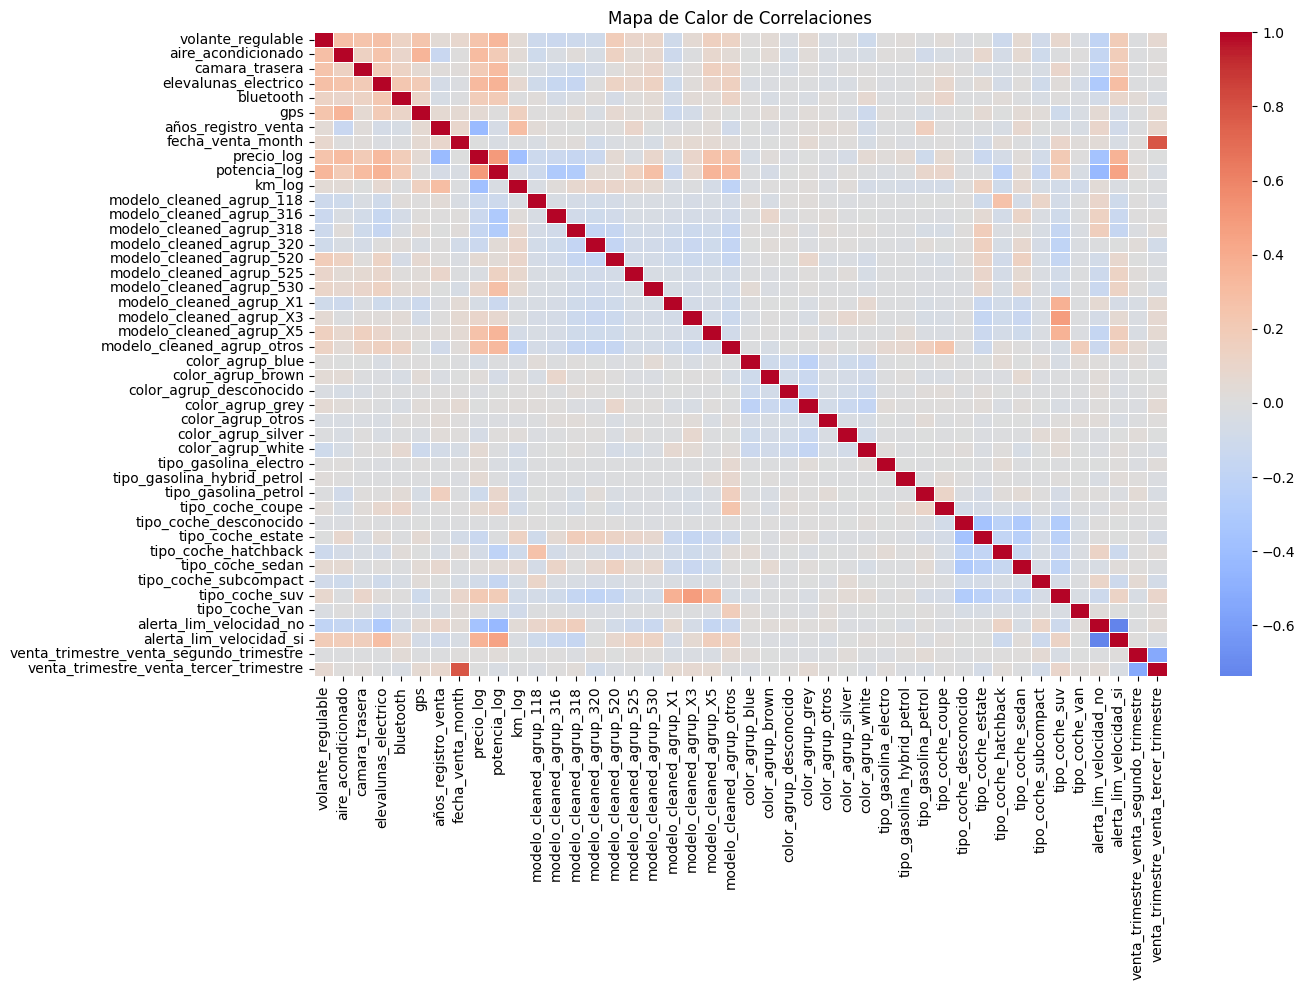

In [194]:
corr = df_bmw.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=0.5)

plt.title("Mapa de Calor de Correlaciones")
plt.tight_layout()
plt.show()

Como vemos, hay algunas variables correladas que vamos a tener que quitar para no distorsionar la predicción del modelo.

## **VIF**

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Una vez tenemos las variables finales ya transformadas para el modelo, vamos a aplicar VIF para estudiar la multicolinealidad entre ellas.

1. Paso 1: Primero VIF por bloques temáticos, para limpiar redundancias dentro de cada grupo.

2. Paso 2: Luego, con las variables elegidas finalmente en el Paso 1, VIF global para asegurarte de que no arrastramos colinealidad entre grupos.

    VIF = 1
→ No hay multicolinealidad.

    VIF > 5
→ Multicolinealidad moderada.

    VIF > 10
→ Multicolinealidad alta → Considera eliminar o transformar.

### Fecha de venta del coche


In [196]:
df_bmw.head()

volante_regulable  aire_acondicionado  camara_trasera  \
0                  1                   1               0   
1                  1                   1               0   
2                  0                   0               0   
3                  1                   1               0   
4                  1                   1               0   

   elevalunas_electrico  bluetooth  gps  años_registro_venta  \
0                     1          0    1             0.185185   
1                     0          1    1             0.148148   
2                     1          0    1             0.185185   
3                     1          1    1             0.148148   
4                     0          1    1             0.148148   

   fecha_venta_month  precio_log  potencia_log    km_log  \
0              0.000    9.332646      0.762863  0.821079   
1              0.125   11.151970      0.952447  0.487360   
2              0.125    9.230241      0.792728  0.859575   
3              0.125   10.130663      0.812045  0.807752   
4              0.375   10.416341      0.839939  0.767803   

   modelo_cleaned_agrup_118  modelo_cleaned_agrup_316  \
0                         1                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   modelo_cleaned_agrup_318  modelo_cleaned_agrup_320  \
0                         0                         0   
1                         0                         0   
2                         0                         1   
3                         0                         0   
4                         0                         0   

   modelo_cleaned_agrup_520  modelo_cleaned_agrup_525  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   modelo_cleaned_agrup_530  modelo_cleaned_agrup_X1  modelo_cleaned_agrup_X3  \
0                         0                        0                        0   
1                         0                        0                        0   
2                         0                        0                        0   
3                         0                        0                        0   
4                         0                        0                        0   

   modelo_cleaned_agrup_X5  modelo_cleaned_agrup_otros  color_agrup_blue  \
0                        0                           0                 0   
1                        0                           1                 0   
2                        0                           0                 0   
3                        0                           1                 0   
4                        0                           1                 0   

   color_agrup_brown  color_agrup_desconocido  color_agrup_grey  \
0                  0                        0                 0   
1                  0                        0                 1   
2                  0                        0                 0   
3                  0                        0                 0   
4                  0                        0                 0   

   color_agrup_otros  color_agrup_silver  color_agrup_white  \
0                  0                   0                  0   
1                  0                   0                  0   
2                  0                   0                  1   
3                  1                   0                  0   
4                  0                   1                  0   

   tipo_gasolina_electro  tipo_gasolina_hybrid_petrol  tipo_gasolina_petrol  \
0                      0                            0         

In [197]:
X = df_bmw[['años_registro_venta',
            'fecha_venta_month',
            'venta_trimestre_venta_segundo_trimestre',	'venta_trimestre_venta_tercer_trimestre']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                   feature        VIF
0                      años_registro_venta   3.745287
1                        fecha_venta_month  26.015889
2  venta_trimestre_venta_segundo_trimestre   7.339559
3   venta_trimestre_venta_tercer_trimestre  13.383910


Como es logico, tienen un VIF alto porque fecha_venta_month es un variable de ordenación de ventas, es decir, antes de ser estandarizada, tenia valores de 1,2,3,4,etc representando cada número a un mes del año. Y por otro lado, las variables venta_trimestre_venta_XXX_trimestre son variables 0/1 que indican si la venta del coche fue en el primer, segundo o tercer trimestre del año 2018 (parece que de septiembre a diciembre no hubo ventas).

In [198]:
# Decidimos quitar fecha_venta_month
df_final = df_bmw.drop(columns='fecha_venta_month')

In [199]:
# vemos de nuevo el VIF sin la variable borrada:
X = df_bmw[['años_registro_venta',
            'venta_trimestre_venta_segundo_trimestre',	'venta_trimestre_venta_tercer_trimestre']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                   feature       VIF
0                      años_registro_venta  2.583918
1  venta_trimestre_venta_segundo_trimestre  1.934446
2   venta_trimestre_venta_tercer_trimestre  1.649472


### Modelo de coche

In [200]:
X = df_bmw[["modelo_cleaned_agrup_118", "modelo_cleaned_agrup_316", "modelo_cleaned_agrup_318", "modelo_cleaned_agrup_320", "modelo_cleaned_agrup_520", "modelo_cleaned_agrup_525", "modelo_cleaned_agrup_530", "modelo_cleaned_agrup_X1", "modelo_cleaned_agrup_X3", "modelo_cleaned_agrup_X5", "modelo_cleaned_agrup_otros"]]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                       feature  VIF
0     modelo_cleaned_agrup_118  1.0
1     modelo_cleaned_agrup_316  1.0
2     modelo_cleaned_agrup_318  1.0
3     modelo_cleaned_agrup_320  1.0
4     modelo_cleaned_agrup_520  1.0
5     modelo_cleaned_agrup_525  1.0
6     modelo_cleaned_agrup_530  1.0
7      modelo_cleaned_agrup_X1  1.0
8      modelo_cleaned_agrup_X3  1.0
9      modelo_cleaned_agrup_X5  1.0
10  modelo_cleaned_agrup_otros  1.0


### Color de coche

In [201]:
X = df_bmw[["color_agrup_blue", "color_agrup_brown", "color_agrup_desconocido", "color_agrup_grey", "color_agrup_otros", "color_agrup_silver", "color_agrup_white"]]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                   feature  VIF
0         color_agrup_blue  1.0
1        color_agrup_brown  1.0
2  color_agrup_desconocido  1.0
3         color_agrup_grey  1.0
4        color_agrup_otros  1.0
5       color_agrup_silver  1.0
6        color_agrup_white  1.0


En principio, con el resto de variables temáticas transformadas con el OHE vamos a obtener lo mismo, asi que vamos a aplicar VIF general.

TO DO: VER SI _LOG DISTORSIONA LA CORRELACION Y ES MEJOR DEJAR LAS VARIABLES ORIGINALES EN VEZ DE TRANSFORMARLAS

In [202]:
X = df_final.drop(columns=["precio_log"])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                    feature         VIF
0                         volante_regulable    3.113470
1                        aire_acondicionado    7.312797
2                            camara_trasera    1.434981
3                      elevalunas_electrico    2.583047
4                                 bluetooth    1.408637
5                                       gps   19.234070
6                       años_registro_venta    7.984199
7                              potencia_log  269.318185
8                                    km_log  121.390516
9                  modelo_cleaned_agrup_118    1.452491
10                 modelo_cleaned_agrup_316    2.115309
11                 modelo_cleaned_agrup_318    4.078339
12                 modelo_cleaned_agrup_320    5.415452
13                 modelo_cleaned_agrup_520    4.906531
14                 modelo_cleaned_agrup_525    2.281005
15                 modelo_cleaned_agrup_530    2.345617
16                  modelo_cleaned_agrup_X1    2

Antes se veía como todas las variables numéricas fruto de la transformación de variables categoricas originales tienen una multicolinealidad perfecta. Solución: en el OneHotEncoding hemos elimnado una variable con drop='first'

Aún así, se sigue viendo una fuerte correlación entre variables y tenemos que eliminar alguna:

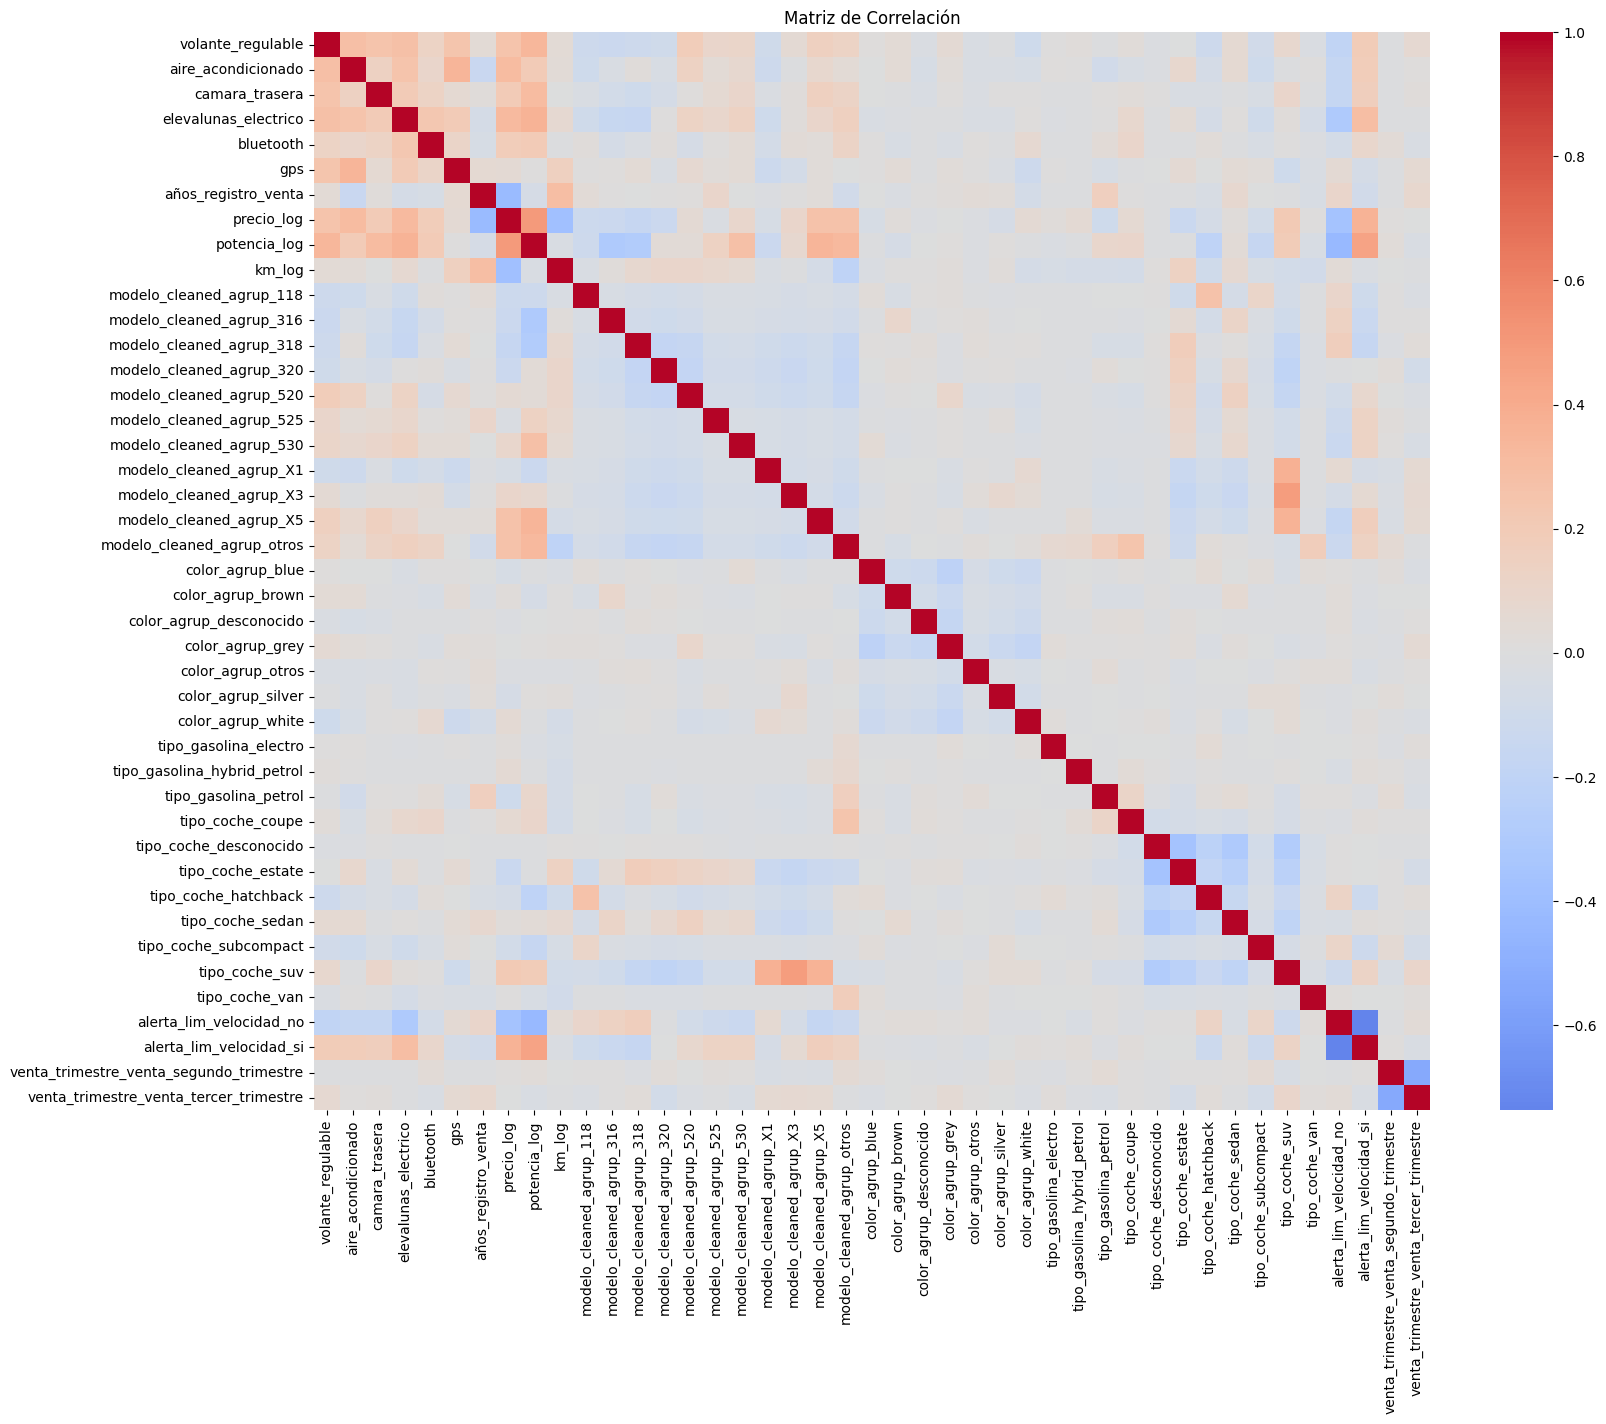

In [203]:
df_corr = df_final.select_dtypes(include=['number'])

corr_matrix = df_corr.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [204]:
# Decidimos quitar tipo_coche_desconocido, km_log
df_final = df_final.drop(columns=['tipo_coche_desconocido', 'km_log'])

In [205]:
X = df_final.drop(columns=["precio_log"])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                    feature        VIF
0                         volante_regulable   3.095818
1                        aire_acondicionado   7.308939
2                            camara_trasera   1.433348
3                      elevalunas_electrico   2.576274
4                                 bluetooth   1.400700
5                                       gps  18.818855
6                       años_registro_venta   7.150624
7                              potencia_log  57.548979
8                  modelo_cleaned_agrup_118   1.449055
9                  modelo_cleaned_agrup_316   2.089441
10                 modelo_cleaned_agrup_318   4.049799
11                 modelo_cleaned_agrup_320   5.352862
12                 modelo_cleaned_agrup_520   4.867972
13                 modelo_cleaned_agrup_525   2.251165
14                 modelo_cleaned_agrup_530   2.269801
15                  modelo_cleaned_agrup_X1   2.833704
16                  modelo_cleaned_agrup_X3   4.295848
17        

In [206]:
# Decidimos seguir quitando variables: potencia_log
df_final = df_final.drop(columns='potencia_log')

In [207]:
X = df_final.drop(columns=["precio_log"])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                    feature        VIF
0                         volante_regulable   3.077461
1                        aire_acondicionado   7.195870
2                            camara_trasera   1.433004
3                      elevalunas_electrico   2.575876
4                                 bluetooth   1.400393
5                                       gps  15.087833
6                       años_registro_venta   6.647696
7                  modelo_cleaned_agrup_118   1.309368
8                  modelo_cleaned_agrup_316   1.753337
9                  modelo_cleaned_agrup_318   2.981687
10                 modelo_cleaned_agrup_320   3.478223
11                 modelo_cleaned_agrup_520   3.431282
12                 modelo_cleaned_agrup_525   1.804103
13                 modelo_cleaned_agrup_530   1.740061
14                  modelo_cleaned_agrup_X1   2.179191
15                  modelo_cleaned_agrup_X3   3.141804
16                  modelo_cleaned_agrup_X5   2.456760
17        

In [208]:
# Decidimos seguir quitando variables: potencia_log
df_final = df_final.drop(columns='gps')

In [209]:
X = df_final.drop(columns=["precio_log"])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                    feature       VIF
0                         volante_regulable  3.019950
1                        aire_acondicionado  6.030860
2                            camara_trasera  1.432459
3                      elevalunas_electrico  2.506848
4                                 bluetooth  1.393143
5                       años_registro_venta  6.165471
6                  modelo_cleaned_agrup_118  1.281069
7                  modelo_cleaned_agrup_316  1.680856
8                  modelo_cleaned_agrup_318  2.829625
9                  modelo_cleaned_agrup_320  3.309031
10                 modelo_cleaned_agrup_520  3.316779
11                 modelo_cleaned_agrup_525  1.776431
12                 modelo_cleaned_agrup_530  1.705562
13                  modelo_cleaned_agrup_X1  2.125621
14                  modelo_cleaned_agrup_X3  3.071207
15                  modelo_cleaned_agrup_X5  2.400819
16               modelo_cleaned_agrup_otros  3.055225
17                         c

Ahora, a pesar de que haya algún valor de VIF algo más elevado como el de años_registro_venta o aire_acondicionado, lo dejamos así.

In [210]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   volante_regulable                        4837 non-null   int64  
 1   aire_acondicionado                       4837 non-null   int64  
 2   camara_trasera                           4837 non-null   int64  
 3   elevalunas_electrico                     4837 non-null   int64  
 4   bluetooth                                4837 non-null   int64  
 5   años_registro_venta                      4837 non-null   float64
 6   precio_log                               4837 non-null   float64
 7   modelo_cleaned_agrup_118                 4837 non-null   int64  
 8   modelo_cleaned_agrup_316                 4837 non-null   int64  
 9   modelo_cleaned_agrup_318                 4837 non-null   int64  
 10  modelo_cleaned_agrup_320                 4837 non-nul

# **Paso final: Guardado de los datos finales**

Como último paso, guardamos el dataset final que nos servirá de input para el modelo de predicción posterior.

In [211]:
df_final.to_csv('./data/final/df_final_bmw.csv', index=False)